# Week 4 - Classification

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [2]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

# Simple Simulated Examples

Here we create a sandbox for you to explore different types of classified data and how different statistical classifiers perform on each type.

## Generating example data

We start by loading one of the "cartoon" or simplified data sets and then dividing it into training and testing sets. To maximize our ability to visualize, each dataset involves two classes, colored yellow and blue, arrayed along two dimensions (`x` and `y`). 

The four data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)
+ `multiBlobs` in which 5 classes are placed as bivariate Gaussians at random locations

`noise` is a variable [0-1] that ranges from no noise in the prescribed pattern [0] to complete noise/randomness [1].

Uncomment (remove the # in front of) each dataset, one at a time, and then run the cell and subsequent cells to examine how each machine learning approach captures each pattern.

In [2]:
noise = .2

#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.random())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise)) #Please try this one
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))

We can easily visualize the rendered datasets because they are generated in two dimensions.

Let's see what dfTrain, a simulated data that we just made, looks like

In [3]:
dfTrain

,vect,category
785,"[0.1008658074202785, -0.4506741508365101]",1
568,"[0.3703364031064204, -0.21913924734319398]",0
200,"[0.18912236561363732, 0.14443550912360167]",0
386,"[0.15908337834183192, 0.13563500383428115]",0
777,"[0.09004148740547663, 0.318269515218851]",1
...,...,...
301,"[0.6625219260693226, 0.23785044464124702]",1
781,"[-0.32820542408348635, -0.6643062722106552]",1
683,"[0.18757314495371452, 0.6184748829000178]",1
742,"[0.039200280539090894, -0.19821986207364836]",0


So, dfTrain has two columns, vect and category. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


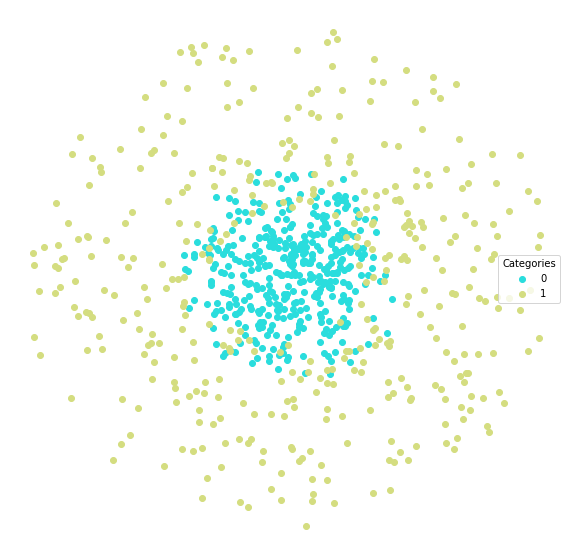

In [4]:
lucem_illud.plotter(dfTrain)

## Training a Machine Learning algorithm

We can now pick a model, there are many more options in `scikit-learn`. These are just a few examples, which array along the machine learning "tribes" described in Pedro Domingos _The Master Algorithm_.

Uncomment (remove the # in front of) each algorithm one at a time, then run the cell and subsequent cells to evaluate how it learns to understand the data.

In [5]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

We're using sklearn here. What is sklearn? It's an open source machine learning library for Python. We use sklearn because it features various machine learning algorithms and it works well with NumPy library. You don't need to understand the sklearn package in detail for the moment, but let's see what methods and attributes sklearn has, because we're going to use some of them:

In [6]:
dir(sklearn)

['__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_distributor_init',
 '_loss',
 'base',
 'clone',
 'config_context',
 'datasets',
 'decomposition',
 'dummy',
 'ensemble',
 'exceptions',
 'externals',
 'feature_extraction',
 'get_config',
 'linear_model',
 'logger',
 'logging',
 'metrics',
 'model_selection',
 'naive_bayes',
 'neighbors',
 'neural_network',
 'os',
 'preprocessing',
 'set_config',
 'setup_module',
 'show_versions',
 'svm',
 'sys',
 'tree',
 'utils']

Now we fit the model by giving it our training data

In [7]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

KNeighborsClassifier(weights='distance')

Here, "stack" function is used. Why did we use stack function here? This is because dfTrain['vect'] is a sequence, while clf.fit() takes an array element. Let's see what dfTrain['vect'] looks like:

In [8]:
dfTrain['vect']

785       [0.1008658074202785, -0.4506741508365101]
568      [0.3703364031064204, -0.21913924734319398]
200      [0.18912236561363732, 0.14443550912360167]
386      [0.15908337834183192, 0.13563500383428115]
777        [0.09004148740547663, 0.318269515218851]
                           ...                     
301       [0.6625219260693226, 0.23785044464124702]
781     [-0.32820542408348635, -0.6643062722106552]
683       [0.18757314495371452, 0.6184748829000178]
742    [0.039200280539090894, -0.19821986207364836]
330      [0.03037349617696499, 0.10642528036415673]
Name: vect, Length: 800, dtype: object

And let's see what np.stack(dfTrain['vect']) does:

In [9]:
np.stack(dfTrain['vect'])

array([[ 0.10086581, -0.45067415],
       [ 0.3703364 , -0.21913925],
       [ 0.18912237,  0.14443551],
       ...,
       [ 0.18757314,  0.61847488],
       [ 0.03920028, -0.19821986],
       [ 0.0303735 ,  0.10642528]])

As you can see, stack function takes a sequence of arrays (which have the same shape) and joins them along a new axis.

## Algorithm evaluation

We can look at few measurements of each classifier's performance by using the testing set

In [10]:
lucem_illud.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.145,0.85562,0.833333,0.790241,0.876289
1,0.145,0.85562,0.877551,0.817713,0.834951


This lets us look at which classes do better:

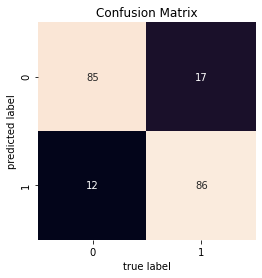

In [11]:
lucem_illud.plotConfusionMatrix(clf, dfTest)

The greater the area under the curve the better.

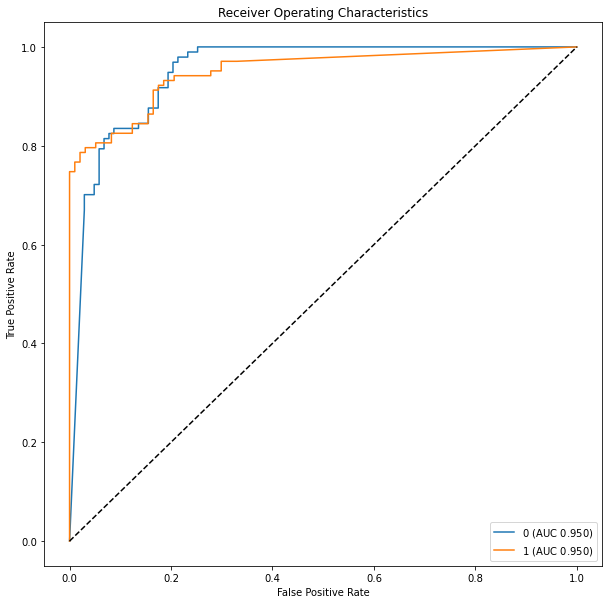

In [12]:
lucem_illud.plotMultiROC(clf, dfTest)

We can also look at the regions the classifer identifies as one class or the other:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


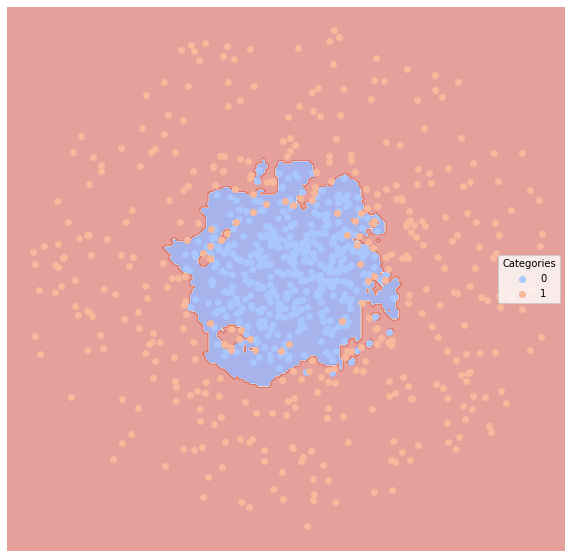

In [13]:
lucem_illud.plotregions(clf, dfTrain)

## Now we do the same for real data

Available data sets include:
+ Reddit threads "classified" by thread topic
+ 20 newsgroups "classified" by group topic
+ Senate press releases "classified" by Senator (2 senators)
+ Senate press releases "classified" by Senator (5 senators)
+ Emails classified as Spam or Ham

In [14]:
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadReddit())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadNewsGroups())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateSmall())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateLarge())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSpam())

Loading Reddit data
Converting to vectors


In [15]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [16]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

GaussianNB()

In [17]:
lucem_illud.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Tales From Tech Support,0.040752,0.936577,0.910448,0.838669,0.897059
Bad Roommates,0.166144,0.760796,0.757143,0.563735,0.595506
Weeaboo Tales,0.206897,0.840451,0.564286,0.546371,0.940476
Relationships,0.156740,0.709836,0.833333,0.508728,0.448718


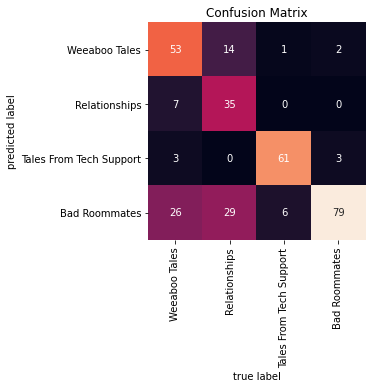

In [18]:
lucem_illud.plotConfusionMatrix(clf, dfTest)

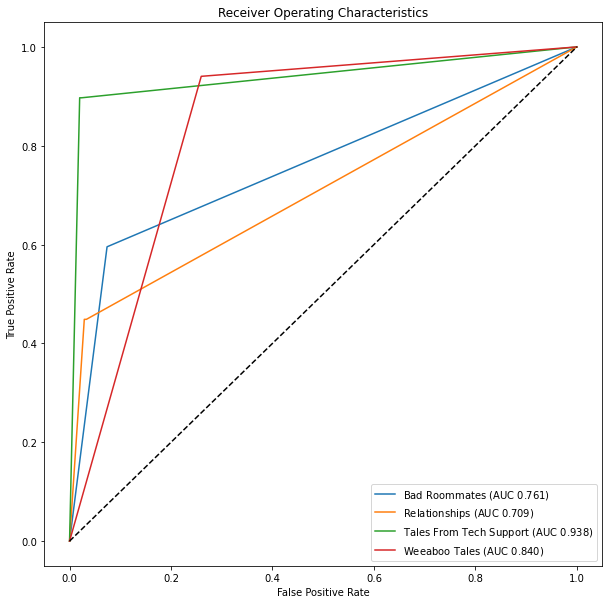

In [19]:
lucem_illud.plotMultiROC(clf, dfTest)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

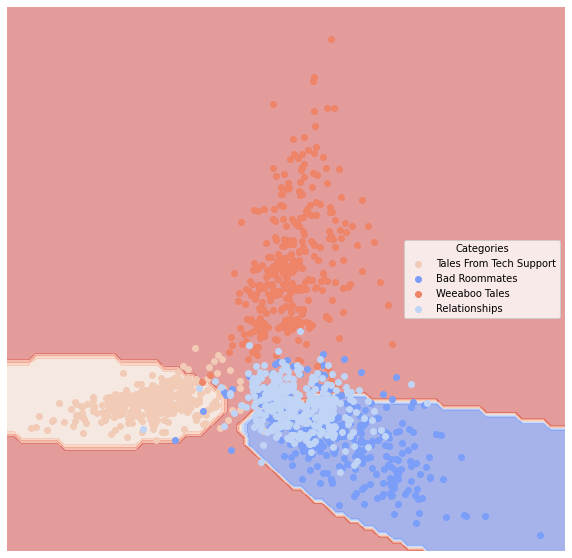

In [20]:
lucem_illud.plotregions(clf, dfTrain)

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

In [44]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import pandas as pd

In [45]:
# Try with random dataset
noise = .2
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.random())


def all_methods_results():
    my_dict = {}
    
    #Bayes
    clf = sklearn.naive_bayes.GaussianNB()
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    lucem_illud.evaluateClassifier(clf, dfTest)
    my_dict["Bayes"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]

    #Analogizes
    clf = sklearn.svm.SVC(kernel = 'linear', probability = False) #slow, set probability = False to speed up
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    lucem_illud.evaluateClassifier(clf, dfTest)
    my_dict["svm_linear"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]

    clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = False) #slower
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    lucem_illud.evaluateClassifier(clf, dfTest)
    my_dict["svm_poly"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]

    clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    lucem_illud.evaluateClassifier(clf, dfTest)
    my_dict["KNN_5"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]

    #Classical Regression
    clf = sklearn.linear_model.LogisticRegression()
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    lucem_illud.evaluateClassifier(clf, dfTest)
    my_dict["logistic"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]

    #Symbolists
    clf = sklearn.tree.DecisionTreeClassifier()
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    lucem_illud.evaluateClassifier(clf, dfTest)
    my_dict["Decision_Tree"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


    clf = sklearn.ensemble.RandomForestClassifier()
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    lucem_illud.evaluateClassifier(clf, dfTest)
    my_dict["RandomForest"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


    #Connectionists. 
    clf = sklearn.neural_network.MLPClassifier()
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    lucem_illud.evaluateClassifier(clf, dfTest)
    my_dict["Connectionists"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


    #Ensemble
    clf = sklearn.ensemble.GradientBoostingClassifier()
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    lucem_illud.evaluateClassifier(clf, dfTest)
    my_dict["Ensemble"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


    return pd.DataFrame.from_dict(my_dict)

all_methods_results()

# From the result, Ensemble method is the best in this case

,Bayes,svm_linear,svm_poly,KNN_5,logistic,Decision_Tree,RandomForest,Connectionists,Ensemble
Category,,,,,,,,,
0,0.55,0.555,0.545,0.5,0.545,0.515,0.44,0.57,0.535
1,0.55,0.555,0.545,0.5,0.545,0.515,0.44,0.57,0.535


In [46]:
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise))
all_methods_results()

# From the result, RandomForest method is the best in this case

,Bayes,svm_linear,svm_poly,KNN_5,logistic,Decision_Tree,RandomForest,Connectionists,Ensemble
Category,,,,,,,,,
0,0.095,0.105,0.11,0.12,0.1,0.11,0.1,0.1,0.085
1,0.095,0.105,0.11,0.12,0.1,0.11,0.1,0.1,0.085


In [47]:
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise))
all_methods_results()

# From the result, RandomForest method is the best in this case

/Users/raychanan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Bayes,svm_linear,svm_poly,KNN_5,logistic,Decision_Tree,RandomForest,Connectionists,Ensemble
Category,,,,,,,,,
0,0.495,0.345,0.26,0.09,0.48,0.16,0.095,0.09,0.095
1,0.495,0.345,0.26,0.09,0.48,0.16,0.095,0.09,0.095


In [48]:
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
all_methods_results()

# From the result, Bayes method is the best in this case

/Users/raychanan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Bayes,svm_linear,svm_poly,KNN_5,logistic,Decision_Tree,RandomForest,Connectionists,Ensemble
Category,,,,,,,,,
0,0.095,0.375,0.46,0.125,0.37,0.12,0.095,0.12,0.095
1,0.095,0.375,0.46,0.125,0.37,0.12,0.095,0.12,0.095


In [49]:
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))
result = all_methods_results()
result

display(result.describe())

# From the result, Bayes, svm_linear, logistic, Connectionists methods are the best in this case

/Users/raychanan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/raychanan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Bayes,svm_linear,svm_poly,KNN_5,logistic,Decision_Tree,RandomForest,Connectionists,Ensemble
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000
mean,0.001600,0.001600,0.002400,0.001600,0.002400,0.00400,0.003200,0.002400,0.00400
std,0.002191,0.002191,0.003286,0.002191,0.003286,0.00469,0.003633,0.003286,0.00469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00200,0.002000,0.000000,0.00200
75%,0.004000,0.004000,0.006000,0.004000,0.006000,0.00800,0.006000,0.006000,0.00800
max,0.004000,0.004000,0.006000,0.004000,0.006000,0.01000,0.008000,0.006000,0.01000


In [50]:
# Go through all of the empirical datasets 
# (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) 
# and classify them with all available methods. 

In [ ]:
# Newsgroups

In [55]:
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadNewsGroups())

my_dict = {}


Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors


In [ ]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["Bayes"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]

In [56]:
#Analogizes
clf = sklearn.svm.SVC(kernel = 'linear', probability = False) #slow, set probability = False to speed up
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["svm_linear"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [57]:
clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = False) #slower
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["svm_poly"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [58]:
clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["KNN_5"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [59]:
#Classical Regression
clf = sklearn.linear_model.LogisticRegression()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["logistic"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [60]:
#Symbolists
clf = sklearn.tree.DecisionTreeClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["Decision_Tree"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [61]:
clf = sklearn.ensemble.RandomForestClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["RandomForest"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [62]:
#Connectionists. 
clf = sklearn.neural_network.MLPClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["Connectionists"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]



In [63]:
#Ensemble
clf = sklearn.ensemble.GradientBoostingClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["Ensemble"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]

In [65]:
result = pd.DataFrame.from_dict(my_dict)
display(result.describe())

# Linear SVM is the best in this case

,Bayes,svm_linear,svm_poly,KNN_5,logistic,Decision_Tree,RandomForest,Connectionists,Ensemble
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.104255,0.058511,0.107447,0.331915,0.063830,0.148936,0.090426,0.062766,0.103191
std,0.025767,0.022416,0.051108,0.115679,0.018630,0.029276,0.023469,0.023661,0.033619
min,0.078723,0.027660,0.053191,0.214894,0.038298,0.106383,0.059574,0.027660,0.057447
25%,0.085106,0.051596,0.088298,0.281915,0.059043,0.141489,0.080319,0.059574,0.094149
50%,0.102128,0.062766,0.100000,0.310638,0.067021,0.159574,0.093617,0.072340,0.108511
75%,0.121277,0.069681,0.119149,0.360638,0.071809,0.167021,0.103723,0.075532,0.117553
max,0.134043,0.080851,0.176596,0.491489,0.082979,0.170213,0.114894,0.078723,0.138298


In [ ]:
# Senate Small

In [66]:
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateSmall())
my_dict = {}

Loading senate data
Converting to vectors


In [67]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["Bayes"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]

In [68]:

#Analogizes
clf = sklearn.svm.SVC(kernel = 'linear', probability = False) #slow, set probability = False to speed up
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["svm_linear"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [69]:

clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = False) #slower
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["svm_poly"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [70]:

clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["KNN_5"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [71]:

#Classical Regression
clf = sklearn.linear_model.LogisticRegression()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["logistic"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [72]:

#Symbolists
clf = sklearn.tree.DecisionTreeClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["Decision_Tree"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [73]:


clf = sklearn.ensemble.RandomForestClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["RandomForest"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [74]:
#Connectionists. 
clf = sklearn.neural_network.MLPClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["Connectionists"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]



In [75]:
#Ensemble
clf = sklearn.ensemble.GradientBoostingClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["Ensemble"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]

In [76]:
result = pd.DataFrame.from_dict(my_dict)
display(result.describe())

#  Random Forest is the best in this case

,Bayes,svm_linear,svm_poly,KNN_5,logistic,Decision_Tree,RandomForest,Connectionists,Ensemble
count,2.000000,2.000000,2.0000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.134897,0.005865,0.1261,0.120235,0.026393,0.008798,0.002933,0.041056,0.005865
std,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min,0.134897,0.005865,0.1261,0.120235,0.026393,0.008798,0.002933,0.041056,0.005865
25%,0.134897,0.005865,0.1261,0.120235,0.026393,0.008798,0.002933,0.041056,0.005865
50%,0.134897,0.005865,0.1261,0.120235,0.026393,0.008798,0.002933,0.041056,0.005865
75%,0.134897,0.005865,0.1261,0.120235,0.026393,0.008798,0.002933,0.041056,0.005865
max,0.134897,0.005865,0.1261,0.120235,0.026393,0.008798,0.002933,0.041056,0.005865


In [ ]:
# Senate Large

In [82]:
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateLarge())
my_dict = {}

Loading senator: Klobuchar
Loading senator: Kyl
Loading senator: Kerry
Loading senator: Kohl
Loading senator: Kennedy
Converting to vectors


In [83]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["Bayes"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]

In [84]:

#Analogizes
clf = sklearn.svm.SVC(kernel = 'linear', probability = False) #slow, set probability = False to speed up
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["svm_linear"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [85]:

clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = False) #slower
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["svm_poly"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [86]:

clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["KNN_5"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [87]:

#Classical Regression
clf = sklearn.linear_model.LogisticRegression()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["logistic"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [88]:

#Symbolists
clf = sklearn.tree.DecisionTreeClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["Decision_Tree"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [89]:


clf = sklearn.ensemble.RandomForestClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["RandomForest"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [90]:
#Connectionists. 
clf = sklearn.neural_network.MLPClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["Connectionists"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]



In [91]:
#Ensemble
clf = sklearn.ensemble.GradientBoostingClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["Ensemble"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]

In [92]:
result = pd.DataFrame.from_dict(my_dict)
display(result.describe())

# is the best in this case

,Bayes,svm_linear,svm_poly,KNN_5,logistic,Decision_Tree,RandomForest,Connectionists,Ensemble
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.108205,0.011282,0.108718,0.075385,0.013846,0.002051,0.001026,0.017436,0.001026
std,0.082474,0.011445,0.094557,0.052332,0.012210,0.001147,0.001404,0.018812,0.001073
min,0.035897,0.001282,0.042308,0.026923,0.003846,0.001282,0.000000,0.001282,0.000000
25%,0.053846,0.003846,0.048718,0.037179,0.005128,0.001282,0.000000,0.002564,0.000000
50%,0.067949,0.005128,0.058974,0.048718,0.008974,0.001282,0.000000,0.007692,0.001282
75%,0.150000,0.017949,0.126923,0.129487,0.017949,0.002564,0.002564,0.035897,0.001282
max,0.233333,0.028205,0.266667,0.134615,0.033333,0.003846,0.002564,0.039744,0.002564


In [ ]:
# Email Spam

In [93]:
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSpam())
my_dict = {}

Loading Spam
Loading Ham
Converting to vectors


In [94]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["Bayes"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]

In [95]:

#Analogizes
clf = sklearn.svm.SVC(kernel = 'linear', probability = False) #slow, set probability = False to speed up
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["svm_linear"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [96]:

clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = False) #slower
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["svm_poly"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [97]:

clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["KNN_5"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [98]:

#Classical Regression
clf = sklearn.linear_model.LogisticRegression()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["logistic"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [99]:

#Symbolists
clf = sklearn.tree.DecisionTreeClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["Decision_Tree"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [100]:
clf = sklearn.ensemble.RandomForestClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["RandomForest"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]


In [101]:
#Connectionists. 
clf = sklearn.neural_network.MLPClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["Connectionists"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]



In [102]:
#Ensemble
clf = sklearn.ensemble.GradientBoostingClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud.evaluateClassifier(clf, dfTest)
my_dict["Ensemble"] = lucem_illud.evaluateClassifier(clf, dfTest)["Error_Rate"]

In [103]:
result = pd.DataFrame.from_dict(my_dict)
display(result.describe())

# Linear SVM is the best in this case

,Bayes,svm_linear,svm_poly,KNN_5,logistic,Decision_Tree,RandomForest,Connectionists,Ensemble
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.138889,0.090643,0.097953,0.106725,0.119883,0.099415,0.078947,0.087719,0.103801
std,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min,0.138889,0.090643,0.097953,0.106725,0.119883,0.099415,0.078947,0.087719,0.103801
25%,0.138889,0.090643,0.097953,0.106725,0.119883,0.099415,0.078947,0.087719,0.103801
50%,0.138889,0.090643,0.097953,0.106725,0.119883,0.099415,0.078947,0.087719,0.103801
75%,0.138889,0.090643,0.097953,0.106725,0.119883,0.099415,0.078947,0.087719,0.103801
max,0.138889,0.090643,0.097953,0.106725,0.119883,0.099415,0.078947,0.087719,0.103801


# Clinton / Obama Press Releases

We often will not have nicely prepared data, so we will work though the proccess of cleaning and structuring in more detail here:

While the Clinton and Obama Senatorial Press Releases are not hand-coded, we can imagine that we have been given a stack of such press releases, but lost the metadata associated with which senatorial office issued which. If we label a few of them, how well can our classifier do at recovering the rest? 

In [48]:
ObamaClintonReleases = pandas.read_csv('../data/ObamaClintonReleases.csv', index_col=0)

I'm pretty sure that you're all familiar with pandas, but, just to clarify: why do we use pandas here? pandas is a Python library which is widely used for analyzing and wrangling data. In particular, pandas loads data and creates data frame, a Python object that looks familiar to us (since it looks like a excel table) and easy to work with. So, using pandas.read_csv function, we take in the csv file and convert it into a data frame. 

In [49]:
type(ObamaClintonReleases)

pandas.core.frame.DataFrame

It's a DataFrame! and it looks like this:

In [50]:
ObamaClintonReleases

,download_url,html_url,name,path,text,targetSenator
0,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2007Obama430.txt,raw/Obama/10Apr2007Obama430.txt,Obama Calls on IRS to Protect Taxpayers ...,Obama
1,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2008Obama108.txt,raw/Obama/10Apr2008Obama108.txt,Statement from Senator Barack Obama on the ...,Obama
2,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2005Obama674.txt,raw/Obama/10Aug2005Obama674.txt,Obama Says Bill Will Help Cut Off Supply of...,Obama
3,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2005Obama675.txt,raw/Obama/10Aug2005Obama675.txt,Obama Durbin Say Illinois Will Receive 33 ...,Obama
4,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2006Obama508.txt,raw/Obama/10Aug2006Obama508.txt,Obama Introduces Bill to Help Tap Power of ...,Obama
...,...,...,...,...,...,...
1704,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton285.txt,raw/Clinton/1Sep2005Clinton285.txt,September 1 2005 Senator Clinton Visit Infoto...,Clinton
1705,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton286.txt,raw/Clinton/1Sep2005Clinton286.txt,September 1 2005 Senator Clinton Announces Ex...,Clinton
1706,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton287.txt,raw/Clinton/1Sep2005Clinton287.txt,September 1 2005 Senator Clinton Joins Local ...,Clinton
1707,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2006Clinton207.txt,raw/Clinton/1Sep2006Clinton207.txt,September 1 2006 Clintons Meet with Cazenovia...,Clinton


Neat! Let's turn the 'targetSenator' column into a binary category variable.

In [51]:
ObamaClintonReleases['category'] = [s == 'Obama' for s in ObamaClintonReleases['targetSenator']]

Tokenize and normalize

In [52]:
ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: lucem_illud.word_tokenize(x))
ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

Let's split the data into training data and testing data.

In [53]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud.trainTestSplit(ObamaClintonReleases, holdBackFraction=holdBackFraction)

In [54]:
print(len(train_data_df))
print(len(test_data_df))

1368
341


## Logistic Regression

First, let's try with a logistic regression, which may be familiar to you from statistical methods classes. First, we must turn the training dataset into a tf-idf matrix (`lucem_illud.generateVecs()` will help with this but for now we are doing it the long way):

In [55]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

The core function here is TfidfVectorizer, which takes a collection of raw documents and turn them to a tf-idf matrix. Just to recap: tf-idf means term frequency-inverse document frequency, a statistic (or, more precisely, a product of two statistics, term frequency and inverse document frequency) that shows the importance of a term vis-a-vis documents. TF, or, term frequency, counts how many times a term is used in a document; IDF, or, inverse-document-frequency, measures common or rare a term appears across documents. 

Let's look at three parameters of TfidfVectorizer: max_df = 100, min_df = 2, and norm='l2'. What do those parameters mean? 

(1) max_df = 100

Here, we specified a thredhold of 100, and the terms that have a document frequency higher than 100 would be ignored.

(2) min_df = 2

We specified a lower bound, 2, and the terms that have a document frequency lower than 2 will be ignored.

(3) norm = 'l2'

This parameter is about vector normalization. In machine learning, we commonly normalize vectors, i.e., change the length of vectors and turn them into a unit vector, before passing them into algorithms. There are various ways of normalizations, and this parameter specifies how we normalize vectors. Here, we set the norm to l2, in which case, we normalize the vectors such that squares of vector elements sums to 1. Alternatively, we can set it to l1, in which case the sum of absolute values of vector elements, not the square of vector elements, is 1. 

fit_transform() literally fits to data and then transform it. So, fit_transform() is just a combination of two steps--(1) fitting parameters to data; (2) then, using the vocabulary and document frequencies learned by fit(), transforming documents into document-term matrix. So, it's the same as fit followed by transform. 

Note that we can use the CountVectorizer instead, which simply produces a matrix of word counts.

In [56]:
TFVects.shape

(1368, 11141)

We can save this in the dataframe to make things easier

In [57]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

Looks simple, but we need to know what todense() does here. todense() returns a dense matrix representation of the matrix. Why do we need this? As you can see above, the TFVects, a document-term matrix, has 11349 columns, and this matrix is sparse, in the sense that it is comprised mostly of zeros. Dense matrices, in contrast, are the matrices that are comprised of mostly non-zeros. Then why do we make sparse matrices into dense ones? Because zero values don't contain important information but take up so much memory.

In a regression, we cannot have more variables than cases. So, we need to first do a dimension reduction. First, we will approah this with PCA. You have previously seen this in week 3. Here we are not concerned about visualization, but rather classification and so all principal components are calculated. Watch out: we have to use `stack` not `sum` for combining the vectors. We note that you could also use topic loading and embedding dimensions as featured variables.

In [58]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

We can store the PCA space vectors in the dataframe too:

In [59]:
train_data_df['pca'] = [r for r in reduced_data]

Visualization in 2D:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


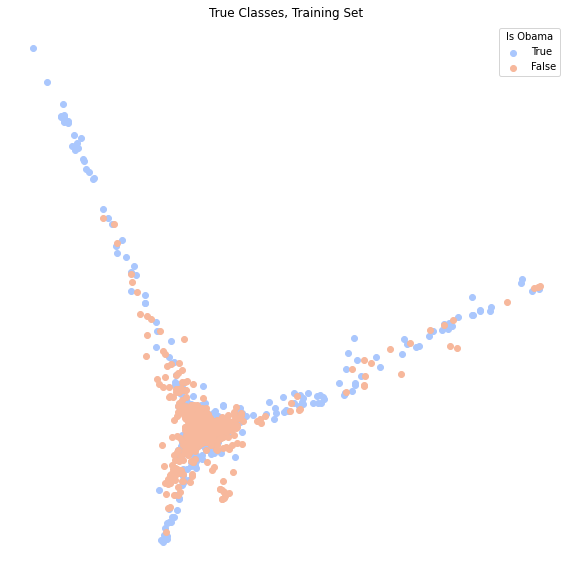

In [60]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Obama')
plt.title('True Classes, Training Set')
plt.show()

PCA cannot distinguish Obama very well. Let's perform a screeplot to see how many Principal Components we need.

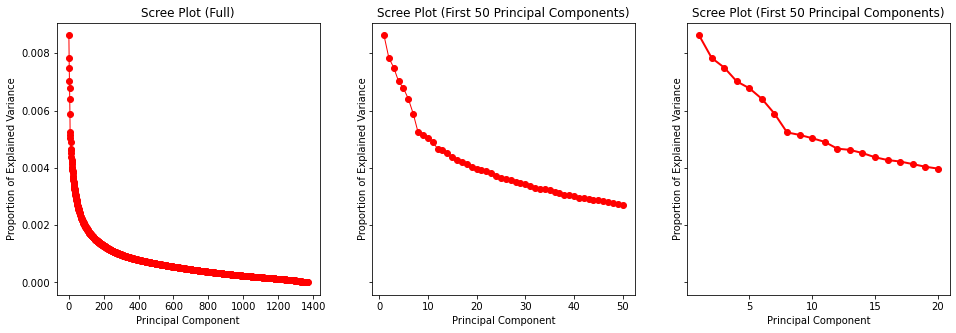

In [61]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Let's choose the first 10 pricipal components as our covariates.

In [62]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

Now we fit a logistic regression to our data.

In [63]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression()

Let's see how the logistic regression performs on the training dataset from which we develop the model. Unfortunately, the mean accuracy is only about 64%.

In [64]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.6571637426900585

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [65]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.6539589442815249

Slightly poorer. How about using more dimensions (40)?

In [66]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Training:
0.7485380116959064
Testing:
0.7126099706744868


Or still more (100)?

In [67]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
0.8187134502923976
Testing:
0.7859237536656891


Or even more (200)!

In [68]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

Training:
0.8713450292397661
Testing:
0.8240469208211144


This is becoming ridiculous (400)!

In [69]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Training:
0.9152046783625731
Testing:
0.8328445747800587


Increasing the number of covariates would overfit our data, and it seems that using a logistic regression, our prediction accuracy is at best about 65%. We can, however, try a logistic regression that uses the TF-IDF scores for each word, but with an L1 regularization or L1-norm loss function, which is also known as least absolute deviations (LAD), least absolute errors (LAE) or L1 penalty. It minimizes the sum of the absolute differences (S) between the target value ($Y_i$) and the estimated values ($f(x_i)$) and prunes all insignificant variables (i.e., word TF-IDF scores):

$S=\sum^n_{i=1}|y_i=f(x_i)|$

The result is a model retaining only the most individually significant features.

In [70]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.9634502923976608


Train the model using training data, and then test it on the testing data.

In [71]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.8357771260997068


81% accuracy seems like the best we can get by using a logistic regression.

Now let's try with Naive Bayes. Classically, it is trained with word counts, but TF-IDF vectors are also quite good:

In [72]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB()

In [73]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.9700292397660819
Testing:
0.9120234604105572


A bit better than the logit, but that's just looking at the accuracy. What about other measures? Let's first save the predictions in the dataframe to save use rerunning the model every time:

In [74]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

Precision:

In [75]:
sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'])

0.9097744360902256

Recall:

In [76]:
sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'])

0.8705035971223022

F1-measure:

In [77]:
sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'])

0.8897058823529412

Let's take a look at how well our posterior distribution looks relative to the truth.

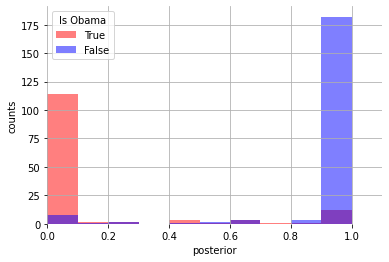

In [78]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Obama")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

The classification is suprisingly accurate. We can even look at what words are most influential with a bit of simple math:

In [97]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Obama' : [],
    'Obama_log_prob' : [],
    'Clinton' : [],
    'Clinton_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Obama'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Obama_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Clinton'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Clinton_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

,Obama,Obama_log_prob,Clinton,Clinton_log_prob
0,signature,-2.182464,5566,-1.741706
1,awarded,-2.286604,brundage,-1.837016
2,island,-2.311297,dick,-1.894174
3,fy,-2.323876,chicago,-2.046366
4,welcomed,-2.349518,reform,-2.162438
5,urging,-2.362590,temporary,-2.177943
6,point,-2.389259,location,-2.225952
7,construction,-2.416658,dangerous,-2.276383
8,having,-2.430644,cases,-2.293774
9,welcome,-2.430644,practices,-2.329493


## Multinomial Naive Bayes

What if we want to classify our text into one of *many* classes? The multinomial Naive Bayes generating model assumes that document features (e.g., words) are generated by draws from a multinomial distribution (recall this gives the probability to observe a particular pattern of counts across features). 

Let's use again the dataset we used in week 3, the 20 newsgroup dataset.

In [79]:
newsgroups = sklearn.datasets.fetch_20newsgroups(data_home = '../data') #Free data to play with: documents from a newsgroup corpus.
newsgroups.target_names #Possible categories, i.e., the newsgroups

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We can pick specific categories, and pull the relevant training and testing sets. 

In [80]:
target_categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #Can change these of course

newsgroupsDF = pandas.DataFrame(columns = ['text', 'category', 'source_file'])
for category in target_categories:
    print("Loading data for: {}".format(category))
    ng = sklearn.datasets.fetch_20newsgroups(categories = [category], remove=['headers', 'footers', 'quotes'], data_home = '../data')
    newsgroupsDF = newsgroupsDF.append(pandas.DataFrame({'text' : ng.data, 'category' : [category] * len(ng.data), 'source_file' : ng.filenames}), ignore_index=True)

Loading data for: talk.religion.misc
Loading data for: soc.religion.christian
Loading data for: sci.space
Loading data for: comp.graphics


Now we need to tokenize, and make a training and testing set:

In [81]:
newsgroupsDF['tokenized_text'] = newsgroupsDF['text'].apply(lambda x: lucem_illud.word_tokenize(x))
newsgroupsDF['normalized_text'] = newsgroupsDF['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

In [82]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

In [83]:
print(len(train_ng_df))
print(len(test_ng_df))

1723
430


We need to extract features from the text. We can use built-in feature extraction to do so. We will use a tf-idf vectorizer, which converts the document into a vector of words with tf-idf weights (term-frequency inverse-document frequency). This gives high weight to words that show up a lot in a given document, but rarely across documents in the corpus (more distinctive). 

In [84]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

Now we can train the model:

In [85]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

MultinomialNB()

...and save predictions to the dataframe:

In [89]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.9042367962855484


In [91]:
train_ng_df[['category', 'nb_predict']][:10]

,category,nb_predict
1202,sci.space,sci.space
1360,sci.space,sci.space
1668,comp.graphics,comp.graphics
397,soc.religion.christian,soc.religion.christian
1121,sci.space,sci.space
1568,sci.space,sci.space
1401,sci.space,sci.space
1218,sci.space,sci.space
1662,comp.graphics,comp.graphics
2058,comp.graphics,comp.graphics


Looks pretty good, lets examine the testing dataset:

In [92]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.7906976744186046


We can even use a confusion matrix, like we used last week for evaluating human coders relative to one another. Now we are evaluating our classifier relative to human coding. We'll just use the one in `lucem_illud`, which requres a classifier and a dataframe with `'vect'` and `'category'` columns, like we have in the examples:

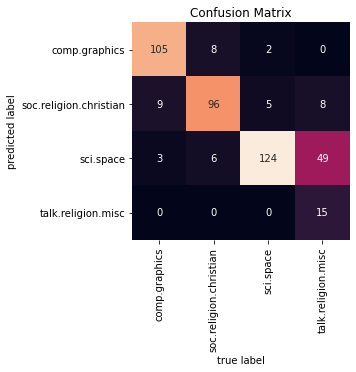

In [93]:
lucem_illud.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

Let's calculate the precision, recall, and F-measures.

In [100]:
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #F-1 measure

0.8315589758906925
0.7906976744186046
0.7608368947083899


We can evaluate these per catagory. This has the same requiments as `plotConfusionMatrix`:

In [96]:
lucem_illud.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
comp.graphics,0.051163,0.932744,0.913043,0.847305,0.897436
soc.religion.christian,0.151163,0.876292,0.681319,0.661191,0.946565
sci.space,0.083721,0.901989,0.813559,0.742574,0.872727
talk.religion.misc,0.132558,0.604167,1.000000,0.340891,0.208333


We can also plot the ROC curves. This has the same requiments as `plotConfusionMatrix`:

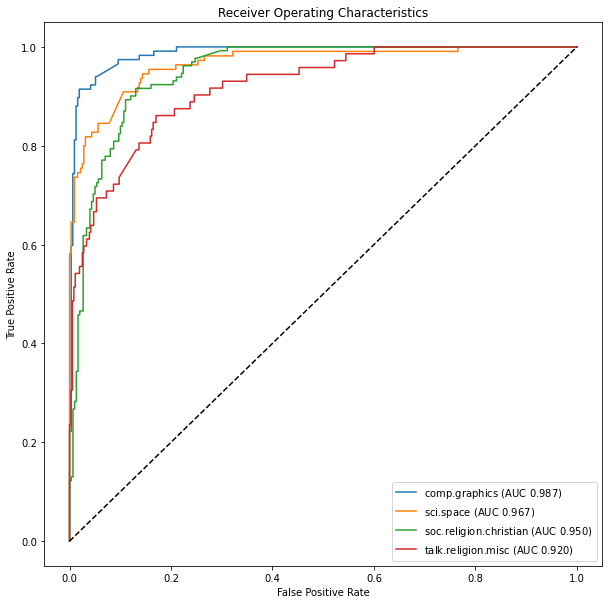

In [101]:
lucem_illud.plotMultiROC(MultinomialNB_ng, test_ng_df)

And we can plot the PCA space visualization:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

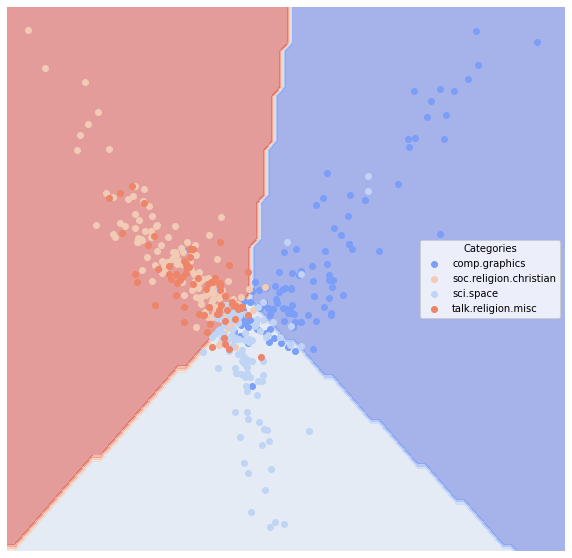

In [102]:
lucem_illud.plotregions(MultinomialNB_ng, test_ng_df)

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


In [104]:
# First of all, load and clean my data

In [105]:
# Turn the 'Judgement' column into a binary category variable.

COVID_tweets = pandas.read_csv('./SMSSpamCollection.csv')
COVID_tweets

COVID_tweets_uncoded = pandas.read_csv('./SMSSpamCollection_uncoded.csv')

In [106]:
COVID_tweets['category'] = [s == 'spam' for s in COVID_tweets['Judgement']]
COVID_tweets['category'][:3]

0    False
1    False
2     True
Name: category, dtype: bool

In [107]:
# Tokenize and normalize

COVID_tweets['tokenized_text'] = COVID_tweets['Messages'].apply(lambda x: lucem_illud.word_tokenize(x))
COVID_tweets['normalized_text'] = COVID_tweets['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

# # Tokenize and normalize uncoded data
COVID_tweets_uncoded['tokenized_text'] = COVID_tweets_uncoded['Messages'].apply(lambda x: lucem_illud.word_tokenize(x))
COVID_tweets_uncoded['normalized_text'] = COVID_tweets_uncoded['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

In [108]:
COVID_tweets['normalized_text']

0       [jurong, point, crazy, available, bugis, n, gr...
1                          [okay, lar, joke, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3                              [u, dun, early, hor, u, c]
4                             [nah, think, go, usf, live]
                              ...                        
5567    [2nd, time, try, contact, u., u, win, £, pound...
5568                      [ü, b, go, esplanade, fr, home]
5569                             [pity, mood, suggestion]
5570    [guy, bitch, act, like, interest, buy, week, g...
5571                                         [rofl, true]
Name: normalized_text, Length: 5572, dtype: object

In [109]:
# Let's split the data into training data and testing data.

holdBackFraction = .2
train_data_df, test_data_df = lucem_illud.trainTestSplit(COVID_tweets, holdBackFraction=holdBackFraction)

In [110]:
print(len(train_data_df))
print(len(test_data_df))

4458
1114


In [111]:
# Try with a logistic regression

In [112]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['Messages'])

In [113]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [114]:
# In a regression, we cannot have more variables than cases. 
# So, we need to first do a dimension reduction.

In [115]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

In [116]:
train_data_df['pca'] = [r for r in reduced_data]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


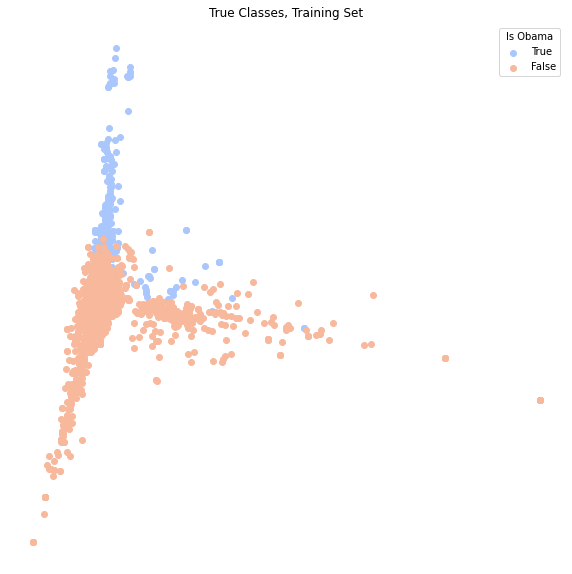

In [117]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Spam
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Spam
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Obama')
plt.title('True Classes, Training Set')
plt.show()

In [118]:
# Why not choose the first 10 pricipal components as our covariates?
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

In [119]:
# Fit a logistic regression to our data (after PCA)!
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression()

In [ ]:
# Perform the logistic regression on the training data

In [123]:
# Predict

train_data_df['nb_predict'] = logistic.predict(np.stack(train_data_df['pca_reduced_10'], axis=0))
print("Training score:")
print(logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category']))

# Good result, but less perfect than other methods demonstrated later

Training score:
0.9057873485868102


In [24]:
# Perform the logistic regression on the testing data

In [125]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['Messages'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])


# the mean accuracy is only about 89.67 !!
# pretty good!

0.8967684021543986

In [128]:
# Now, add penalty to the logistics regression
# The result is a model retaining only the most individually significant features.

logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])


LogisticRegression()

In [129]:
# Predict

train_data_df['nb_predict'] = logistic_l1.predict(np.stack(train_data_df['vect'], axis=0))
print("Training score:")
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

# Fantastic! Our performance is getting better

Training score:
0.9661283086585913


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


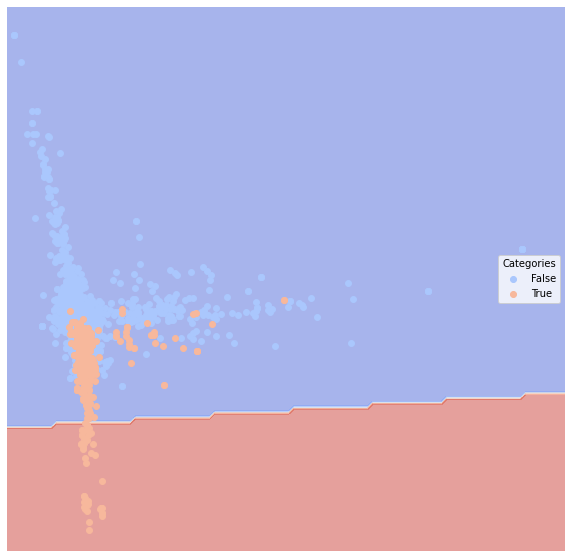

In [130]:
# Plot boundries 

lucem_illud.plotregions(logistic_l1, train_data_df)

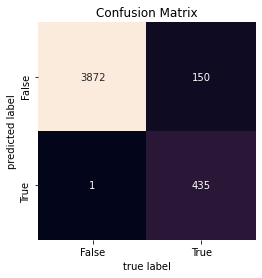

In [131]:
# Plot confusion matrix
lucem_illud.plotConfusionMatrix(logistic_l1, train_data_df)

In [132]:
# Evaluate AUC
lucem_illud.metrics.evaluateClassifier(logistic_l1, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.033872,0.871666,0.962705,0.962681,0.999742
True,0.033872,0.871666,0.997706,0.775532,0.743590


In [133]:
# Calculate the accuracy, precision, recall, and F-measures.

# Accuracy 

print(sklearn.metrics.accuracy_score(train_data_df['category'],logistic_l1.predict(np.stack(train_data_df['vect'], axis = 0))))

# Precision
print(sklearn.metrics.precision_score(train_data_df['category'], train_data_df['nb_predict'], average = 'weighted')) 

# Recall
print(sklearn.metrics.recall_score(train_data_df['category'], train_data_df['nb_predict'], average = 'weighted')) 

# F-1 measure
print(sklearn.metrics.f1_score(train_data_df['category'], train_data_df['nb_predict'], average = 'weighted')) 


0.9661283086585913
0.9672981592032468
0.9661283086585913
0.9639763951726482


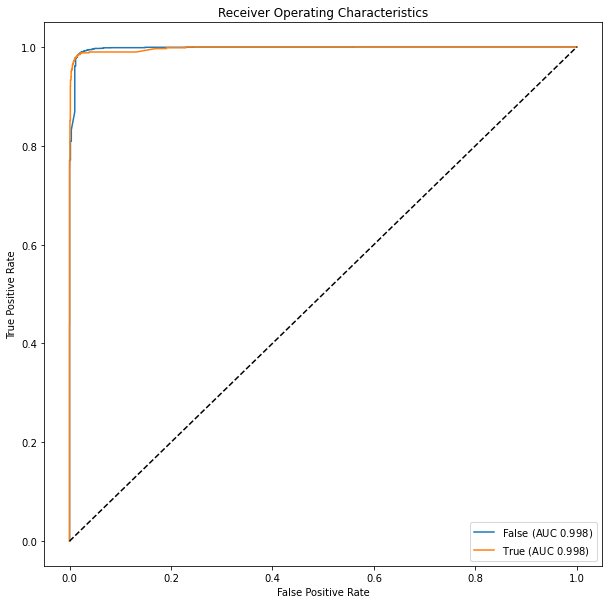

In [134]:
# Plot the ROC curves
lucem_illud.plotMultiROC(logistic_l1, train_data_df)

In [ ]:
# Perform Logistic regression with the testing data 

In [135]:
# Predict

test_data_df['nb_predict'] = logistic_l1.predict(np.stack(test_data_df['vect'], axis=0))
print("Training score:")
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))


Training score:
0.9515260323159784


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


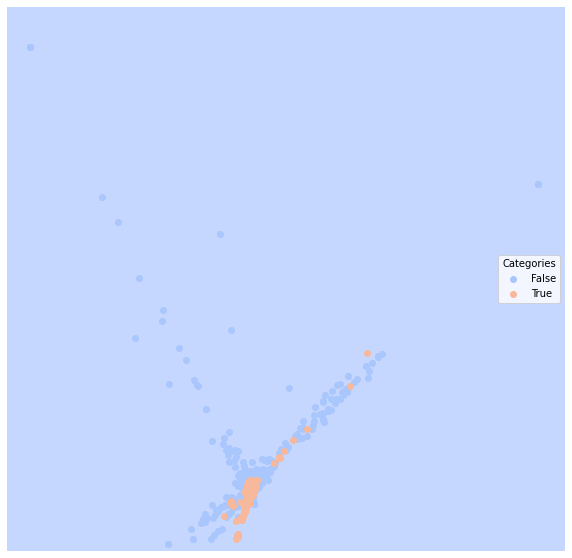

In [136]:
# Plot boundries 

lucem_illud.plotregions(logistic_l1, test_data_df)


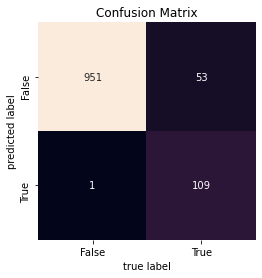

In [137]:
# Plot confusion matrix
lucem_illud.plotConfusionMatrix(logistic_l1, test_data_df)


In [138]:
# Evaluate AUC
lucem_illud.metrics.evaluateClassifier(logistic_l1, test_data_df)


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.048474,0.835895,0.947211,0.947114,0.99895
True,0.048474,0.835895,0.990909,0.714299,0.67284


In [139]:
# Calculate the accuracy, precision, recall, and F-measures.
# Accuracy 

print(sklearn.metrics.accuracy_score(test_data_df['category'],logistic_l1.predict(np.stack(test_data_df['vect'], axis = 0))))

# Precision
print(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'], average = 'weighted')) 

# Recall
print(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'], average = 'weighted')) 

# F-1 measure
print(sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'], average = 'weighted')) 


0.9515260323159784
0.953565792322793
0.9515260323159784
0.9475368282811136


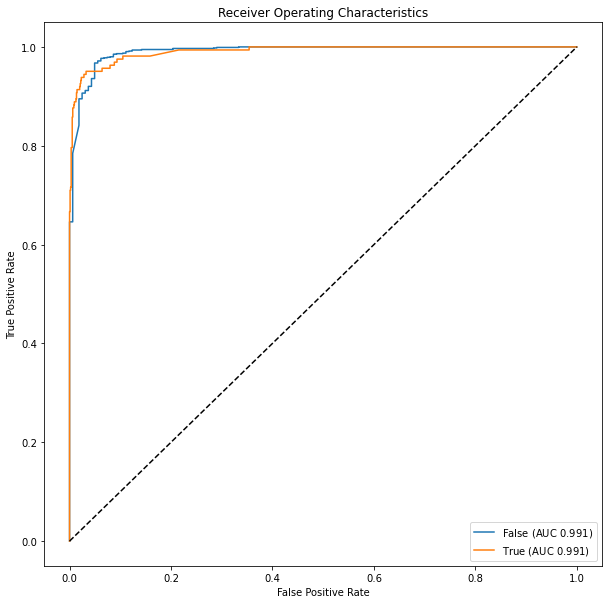

In [140]:
# Plot the ROC curves
lucem_illud.plotMultiROC(logistic_l1, test_data_df)


In [ ]:
# Perform the logistic regession with the uncoded data

In [142]:
TFVects_uncoded = TFVectorizer.transform(COVID_tweets_uncoded['Messages'])
COVID_tweets_uncoded['vect'] = [np.array(v).flatten() for v in TFVects_uncoded.todense()]

COVID_tweets_uncoded['nb_predict'] = logistic_l1.predict(np.stack(COVID_tweets_uncoded['vect'], axis=0))
COVID_tweets_uncoded['nb_predict_prob_true'] = logistic_l1.predict_proba(np.stack(COVID_tweets_uncoded['vect'], axis=0))[:,0] #other is prop false
COVID_tweets_uncoded


,Messages,tokenized_text,normalized_text,vect,nb_predict,nb_predict_prob_true
0,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, crazy, Available, o...","[jurong, point, crazy, available, bugis, n, gr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.960175
1,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]","[okay, lar, joke, wif, u, oni]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.952555
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, wkly, comp, win, fa, cup, final,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,0.353612
3,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, U, c, already, t...","[u, dun, early, hor, u, c]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.967690
4,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, he...","[nah, think, go, usf, live]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.948722
...,...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, try, contact, u., u, win, £, pound...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,0.114137
5568,Will ü b going to esplanade fr home?,"[Will, ü, b, going, to, esplanade, fr, home]","[ü, b, go, esplanade, fr, home]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.943030
5569,"Pity, * was in mood for that. So...any other s...","[Pity, was, in, mood, for, that, So, any, othe...","[pity, mood, suggestion]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.933804
5570,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,...","[guy, bitch, act, like, interest, buy, week, g...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.946339


In [ ]:
# Let's try with Naive Bayes.

In [144]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB()

In [145]:
# Naive Bayes with the training data

In [146]:
# Predict

train_data_df['nb_predict'] = naiveBayes.predict(np.stack(train_data_df['vect'], axis=0))
print("Training score:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))


Training score:
0.9851951547779273


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


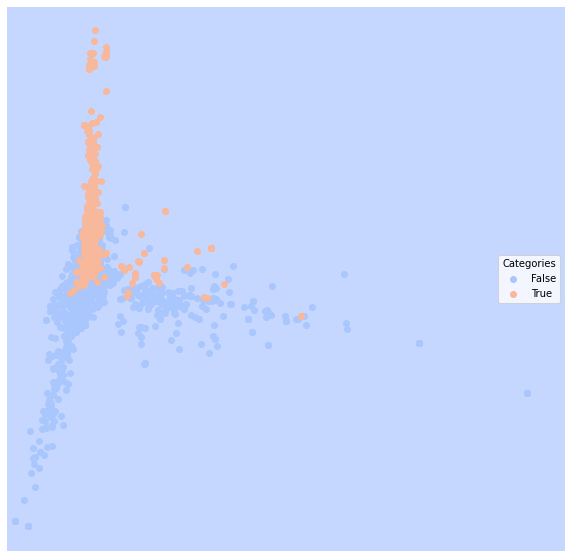

In [147]:
# Plot boundries 

lucem_illud.plotregions(naiveBayes, train_data_df)


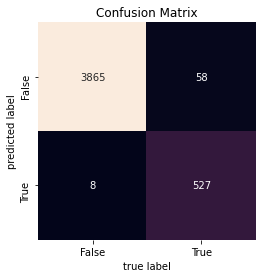

In [148]:
# Plot confusion matrix
lucem_illud.plotConfusionMatrix(naiveBayes, train_data_df)


In [149]:
# Evaluate AUC
lucem_illud.metrics.evaluateClassifier(naiveBayes, train_data_df)


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.014805,0.949395,0.985215,0.984975,0.997934
True,0.014805,0.949395,0.985047,0.900394,0.900855


In [150]:
# Calculate the accuracy, precision, recall, and F-measures.
# Accuracy 

print(sklearn.metrics.accuracy_score(train_data_df['category'],naiveBayes.predict(np.stack(train_data_df['vect'], axis = 0))))

# Precision
print(sklearn.metrics.precision_score(train_data_df['category'], train_data_df['nb_predict'], average = 'weighted')) 

# Recall
print(sklearn.metrics.recall_score(train_data_df['category'], train_data_df['nb_predict'], average = 'weighted')) 

# F-1 measure
print(sklearn.metrics.f1_score(train_data_df['category'], train_data_df['nb_predict'], average = 'weighted')) 


0.9851951547779273
0.9851932630393858
0.9851951547779273
0.9849121652563362


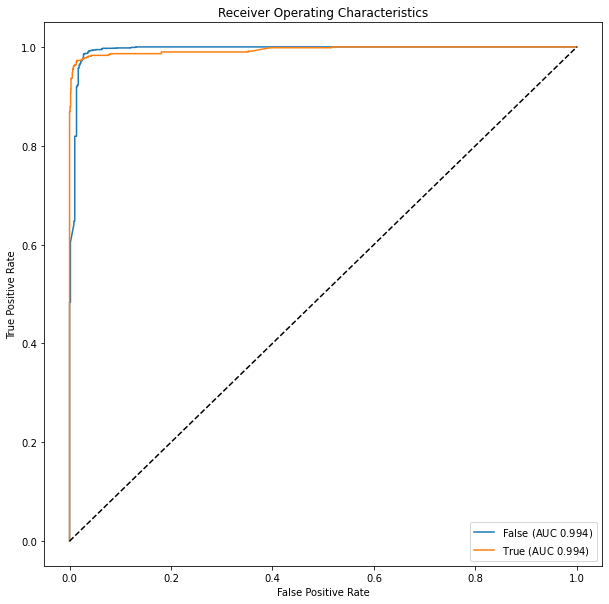

In [151]:
# Plot the ROC curves
lucem_illud.plotMultiROC(naiveBayes, train_data_df)


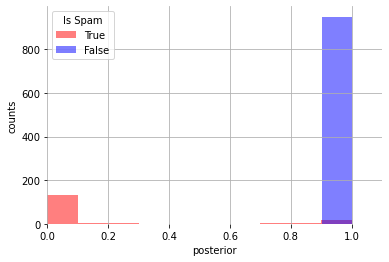

In [64]:
# Take a look at how well our posterior distribution looks relative to the truth.
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Spam")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

# Very good!

In [67]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Spam' : [],
    'Spam_log_prob' : [],
    'Not_Spam' : [],
    'Not_Spam_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Spam'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Spam_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Not_Spam'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Not_Spam_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

,Spam,Spam_log_prob,Not_Spam,Not_Spam_log_prob
0,later,-3.667181,claim,-1.909117
1,did,-3.697953,www,-1.932374
2,hope,-3.773665,prize,-2.126530
3,hey,-3.796393,won,-2.231890
4,pls,-3.807954,150p,-2.297487
5,hi,-3.819650,uk,-2.349673
6,night,-3.831484,cash,-2.386041
7,oh,-3.831484,win,-2.483205
8,wat,-3.831484,contact,-2.524877
9,dear,-3.855582,urgent,-2.546383


In [ ]:
# Perform Naive Bayes with the uncoded data

In [152]:
# Fianlly, take a look at how it generates result on the uncoded dataset

COVID_tweets_uncoded['nb_predict'] = naiveBayes.predict(np.stack(COVID_tweets_uncoded['vect'], axis=0))
COVID_tweets_uncoded['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(COVID_tweets_uncoded['vect'], axis=0))[:,0] #other is prop false
COVID_tweets_uncoded

,Messages,tokenized_text,normalized_text,vect,nb_predict,nb_predict_prob_true
0,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, crazy, Available, o...","[jurong, point, crazy, available, bugis, n, gr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,9.999999e-01
1,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]","[okay, lar, joke, wif, u, oni]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,9.999999e-01
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, wkly, comp, win, fa, cup, final,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,5.600928e-20
3,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, U, c, already, t...","[u, dun, early, hor, u, c]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,1.000000e+00
4,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, he...","[nah, think, go, usf, live]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,9.999998e-01
...,...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, try, contact, u., u, win, £, pound...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,9.681029e-17
5568,Will ü b going to esplanade fr home?,"[Will, ü, b, going, to, esplanade, fr, home]","[ü, b, go, esplanade, fr, home]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,9.999993e-01
5569,"Pity, * was in mood for that. So...any other s...","[Pity, was, in, mood, for, that, So, any, othe...","[pity, mood, suggestion]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,9.999989e-01
5570,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,...","[guy, bitch, act, like, interest, buy, week, g...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,9.999996e-01


In [ ]:
# So in general, the Naive Bayes is doing the best in this second excerise

# Decision Trees

Decision trees can be used to predict both categorical/class labels (i.e., classification) and continuous labels (i.e., regression).

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

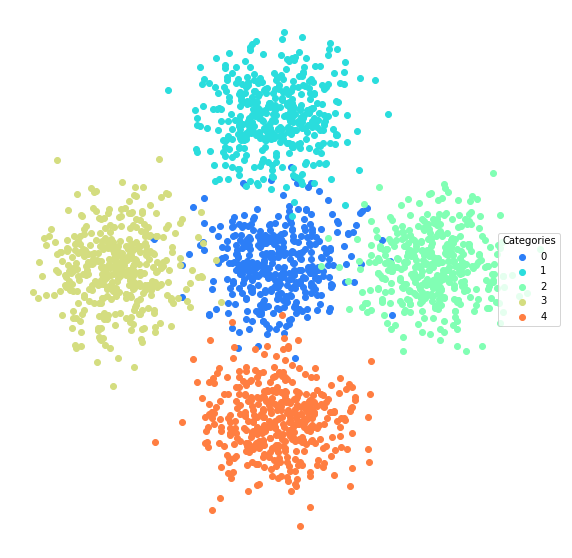

In [103]:
blobs_df = lucem_illud.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud.trainTestSplit(blobs_df)
lucem_illud.plotter(df_exampleTree_train)

Now we import our Decision Tree classifier from sklearn.tree (familiar syntax) and fit it using the fit method.

In [104]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

DecisionTreeClassifier(max_depth=4, random_state=0)

To see what's going on visually with the classification: 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

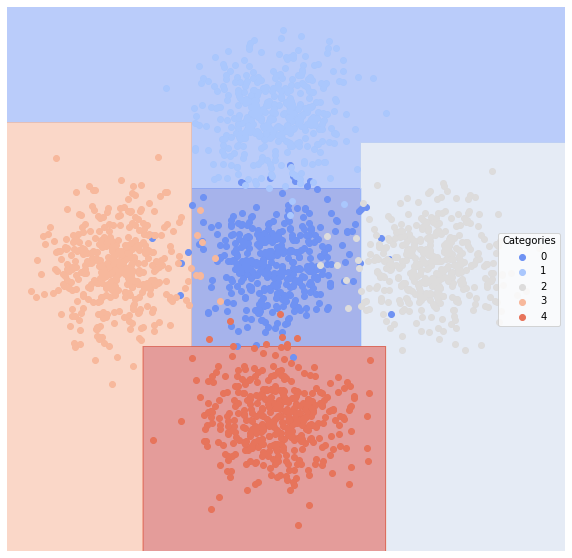

In [106]:
lucem_illud.plotregions(clf_tree, df_exampleTree_train)

In [107]:
lucem_illud.evaluateClassifier(clf_tree, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.016,0.976841,0.963964,0.937227,0.963964
1,0.004,0.994134,0.990826,0.983736,0.990826
2,0.006,0.983871,1.000000,0.973742,0.967742
3,0.008,0.991123,0.969697,0.961700,0.989691
4,0.002,0.998780,0.989011,0.989011,1.000000


Lets look at accuracy:

In [108]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.982

What happens if we trim the tree?

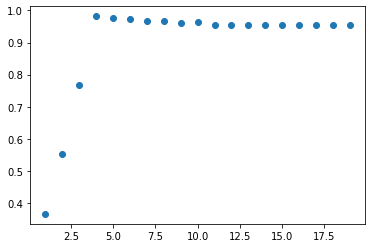

In [109]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

We can select different layers of the decision tree or "prune" it. At approximately four layers down in the decision tree, the shape is somewhat odd, suggesting that our model is overfitting beyond those four layers.

Combining multiple overfitting estimators turns out to be a key idea in machine learning. This is called **bagging** and is a type of **ensemble** method. The idea is to make many randomized estimators--each can overfit, as decision trees are wont to do--but then to combine them, ultimately producing a better classification. A **random forest** is produced by bagging decision trees.

In [110]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [111]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                  max_samples=0.8, n_estimators=100, random_state=1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

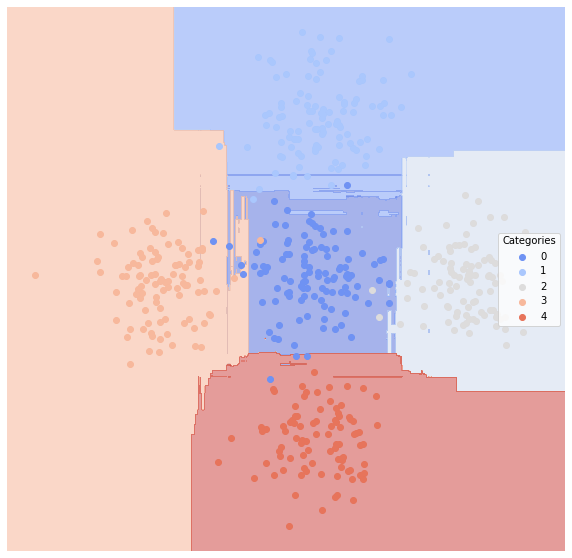

In [112]:
lucem_illud.plotregions(bag, df_exampleTree_test)

In [114]:
lucem_illud.evaluateClassifier(bag, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.032,0.947243,0.943925,0.878887,0.909910
1,0.010,0.983681,0.981481,0.960468,0.972477
2,0.008,0.986790,0.978495,0.961452,0.978495
3,0.012,0.984728,0.959596,0.943810,0.979381
4,0.006,0.996341,0.967742,0.967742,1.000000


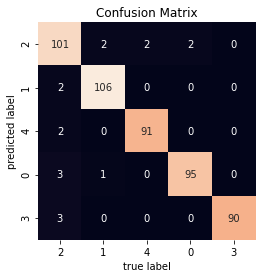

In [115]:
lucem_illud.plotConfusionMatrix(bag, df_exampleTree_test)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

In [ ]:
# Perform decision tree with train data

In [92]:
# Train the model 
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category'])

DecisionTreeClassifier(max_depth=4, random_state=0)

In [94]:
# predict train data
train_data_df['nb_predict'] = clf_tree.predict(np.stack(train_data_df['vect'], axis=0))
print("Training score:")
print(clf_tree.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

# Great result! But less as good as the naive bayes...

Training score:
0.924181247196052


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


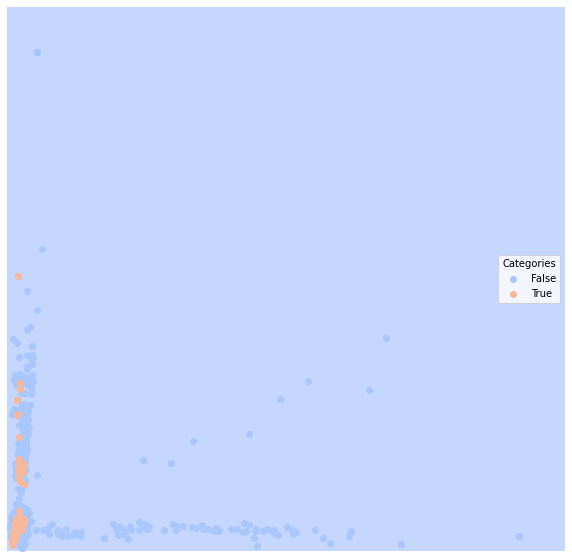

In [83]:
# Plot regions
lucem_illud.plotregions(clf_tree, train_data_df)

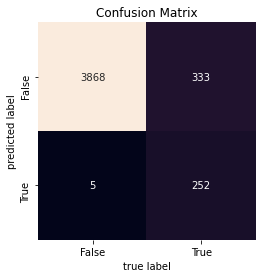

In [93]:
# plot confusion matrix
lucem_illud.plotConfusionMatrix(clf_tree, train_data_df)

In [95]:
# Evaluate
lucem_illud.evaluateClassifier(clf_tree, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.075819,0.714739,0.920733,0.920666,0.998709
True,0.075819,0.714739,0.980545,0.497086,0.430769


In [98]:
# Accuracy 

print(sklearn.metrics.accuracy_score(train_data_df['category'],clf_tree.predict(np.stack(train_data_df['vect'], axis = 0))))

# Precision
print(sklearn.metrics.precision_score(train_data_df['category'], train_data_df['nb_predict'], average = 'weighted')) 

# Recall
print(sklearn.metrics.recall_score(train_data_df['category'], train_data_df['nb_predict'], average = 'weighted')) 

# F-1 measure
print(sklearn.metrics.f1_score(train_data_df['category'], train_data_df['nb_predict'], average = 'weighted')) 

0.924181247196052
0.9285819203601787
0.924181247196052
0.9109537382150502


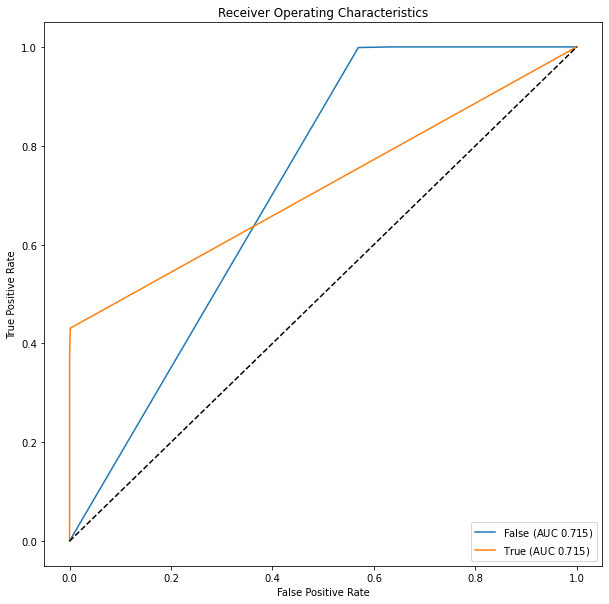

In [99]:
# Plot the ROC curves
lucem_illud.plotMultiROC(clf_tree, train_data_df)

In [ ]:
# Perform Decision Tree with test data

In [101]:
# Predict
test_data_df['nb_predict'] = clf_tree.predict(np.stack(test_data_df['vect'], axis=0))
print("Testing score:")
print(clf_tree.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

# About 90.75%, not good comparing with other methods

Testing score:
0.90754039497307


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


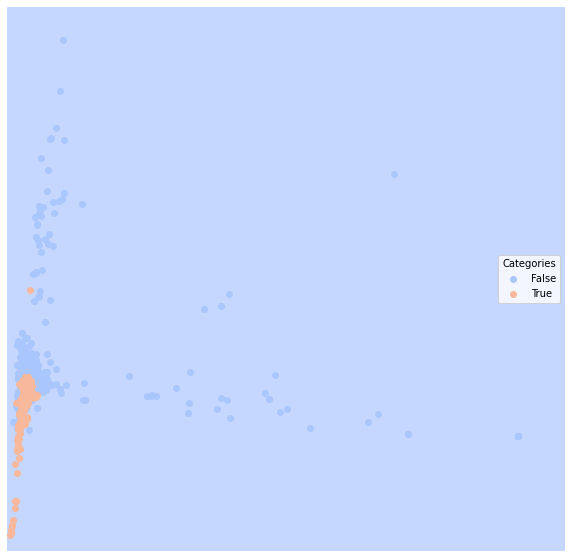

In [102]:
# Plot boundries 
lucem_illud.plotregions(clf_tree, test_data_df)

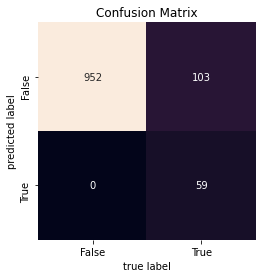

In [103]:
# Plot confusion matrix

lucem_illud.plotConfusionMatrix(clf_tree, test_data_df)


In [104]:
# Evaluate AUC
lucem_illud.metrics.evaluateClassifier(clf_tree, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.09246,0.682099,0.90237,0.902370,1.000000
True,0.09246,0.682099,1.00000,0.456657,0.364198


In [105]:
# Calculate the accuracy, precision, recall, and F-measures.
# Accuracy 

print(sklearn.metrics.accuracy_score(test_data_df['category'],clf_tree.predict(np.stack(test_data_df['vect'], axis = 0))))

# Precision
print(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'], average = 'weighted')) 

# Recall
print(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'], average = 'weighted')) 

# F-1 measure
print(sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'], average = 'weighted')) 


0.90754039497307
0.9165672568856518
0.90754039497307
0.8883669093880655


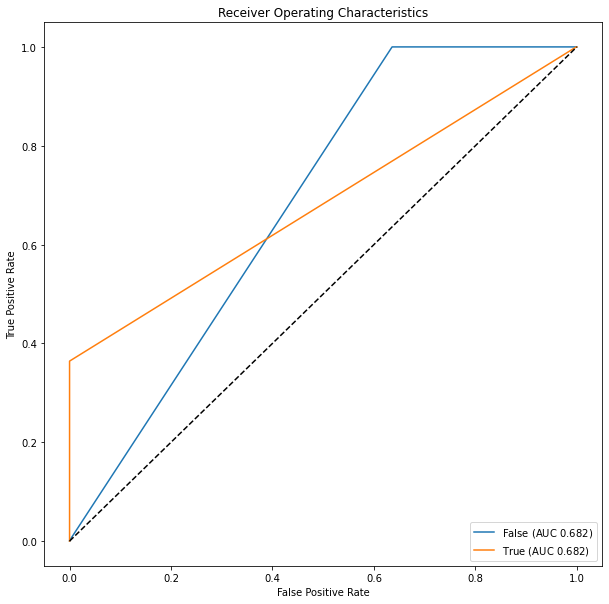

In [106]:
# Plot the ROC curves
lucem_illud.plotMultiROC(clf_tree, test_data_df)


In [107]:
# Perform decision tree with uncoded data

# Predict
COVID_tweets_uncoded['nb_predict'] = clf_tree.predict(np.stack(COVID_tweets_uncoded['vect'], axis=0))
COVID_tweets_uncoded['nb_predict_prob_true'] = clf_tree.predict_proba(np.stack(COVID_tweets_uncoded['vect'], axis=0))[:,0] #other is prop false
COVID_tweets_uncoded

,Messages,tokenized_text,normalized_text,vect,nb_predict,nb_predict_prob_true
0,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, crazy, Available, o...","[jurong, point, crazy, available, bugis, n, gr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.920714
1,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]","[okay, lar, joke, wif, u, oni]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.920714
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, wkly, comp, win, fa, cup, final,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.920714
3,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, U, c, already, t...","[u, dun, early, hor, u, c]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.920714
4,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, he...","[nah, think, go, usf, live]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.920714
...,...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, try, contact, u., u, win, £, pound...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,0.000000
5568,Will ü b going to esplanade fr home?,"[Will, ü, b, going, to, esplanade, fr, home]","[ü, b, go, esplanade, fr, home]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.920714
5569,"Pity, * was in mood for that. So...any other s...","[Pity, was, in, mood, for, that, So, any, othe...","[pity, mood, suggestion]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.920714
5570,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,...","[guy, bitch, act, like, interest, buy, week, g...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.920714


In [ ]:
# Random forest 

In [87]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.
bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [88]:
# Fit the model
bag.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                  max_samples=0.8, n_estimators=100, random_state=1)

In [109]:
# Predict
train_data_df['nb_predict'] = bag.predict(np.stack(train_data_df['vect'], axis=0))
print("Training score:")
print(bag.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

# Getting better...

Training score:
0.9573799910273665


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


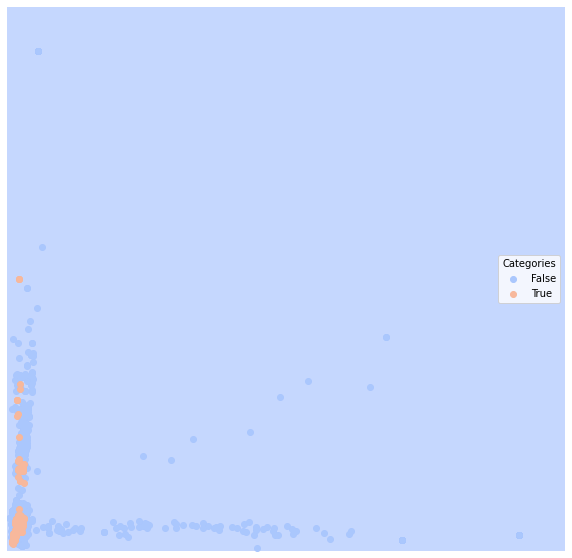

In [110]:
# Plot boundries 
lucem_illud.plotregions(bag, train_data_df)

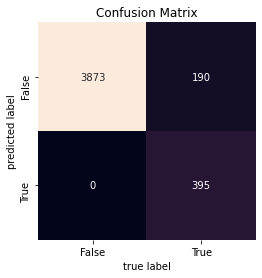

In [111]:
# Plot confusion matrix
lucem_illud.plotConfusionMatrix(bag, train_data_df)

In [112]:
# Evaluate AUC
lucem_illud.metrics.evaluateClassifier(bag, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.04262,0.837607,0.953237,0.953237,1.000000
True,0.04262,0.837607,1.000000,0.717834,0.675214


In [113]:
# Calculate the accuracy, precision, recall, and F-measures.
# Accuracy 

print(sklearn.metrics.accuracy_score(train_data_df['category'],bag.predict(np.stack(train_data_df['vect'], axis = 0))))

# Precision
print(sklearn.metrics.precision_score(train_data_df['category'], train_data_df['nb_predict'], average = 'weighted')) 

# Recall
print(sklearn.metrics.recall_score(train_data_df['category'], train_data_df['nb_predict'], average = 'weighted')) 

# F-1 measure
print(sklearn.metrics.f1_score(train_data_df['category'], train_data_df['nb_predict'], average = 'weighted')) 


0.9573799910273665
0.9593730507627345
0.9573799910273665
0.9537586537051542


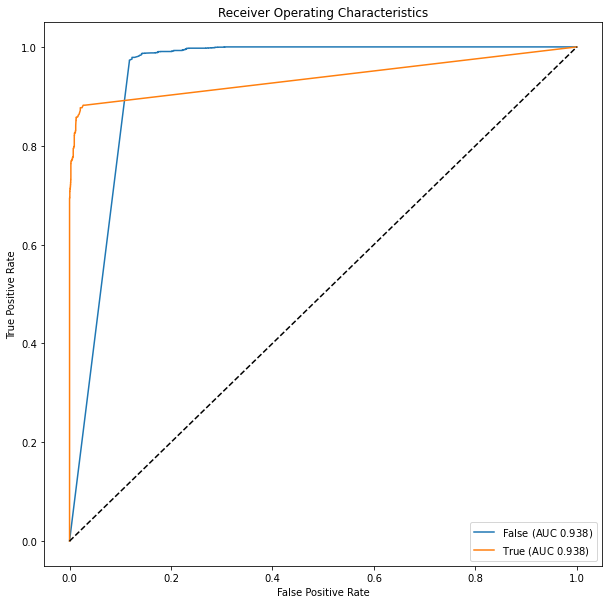

In [114]:
# Plot the ROC curves
lucem_illud.plotMultiROC(bag, train_data_df)


In [ ]:
# Perform ramdom forest with test data

In [115]:
# Predict

test_data_df['nb_predict'] = bag.predict(np.stack(test_data_df['vect'], axis=0))
print("Training score:")
print(bag.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))


Training score:
0.940754039497307


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


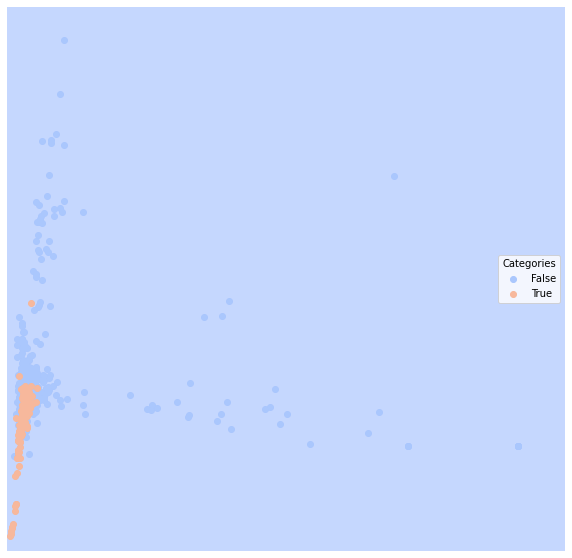

In [116]:
# Plot boundries 

lucem_illud.plotregions(bag, test_data_df)

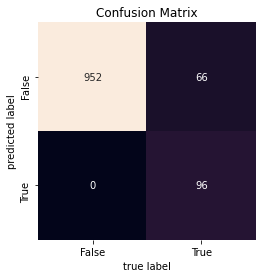

In [117]:
# Plot confusion matrix
lucem_illud.plotConfusionMatrix(bag, test_data_df)


In [90]:
# Evaluate AUC
lucem_illud.evaluateClassifier(bag, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.059246,0.796296,0.935167,0.935167,1.000000
True,0.059246,0.796296,1.000000,0.651839,0.592593


In [118]:
# Calculate the accuracy, precision, recall, and F-measures.
# Accuracy 

print(sklearn.metrics.accuracy_score(test_data_df['category'],bag.predict(np.stack(test_data_df['vect'], axis = 0))))

# Precision
print(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'], average = 'weighted')) 

# Recall
print(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'], average = 'weighted')) 

# F-1 measure
print(sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'], average = 'weighted')) 


0.940754039497307
0.9445951332037684
0.940754039497307
0.9341685128287514


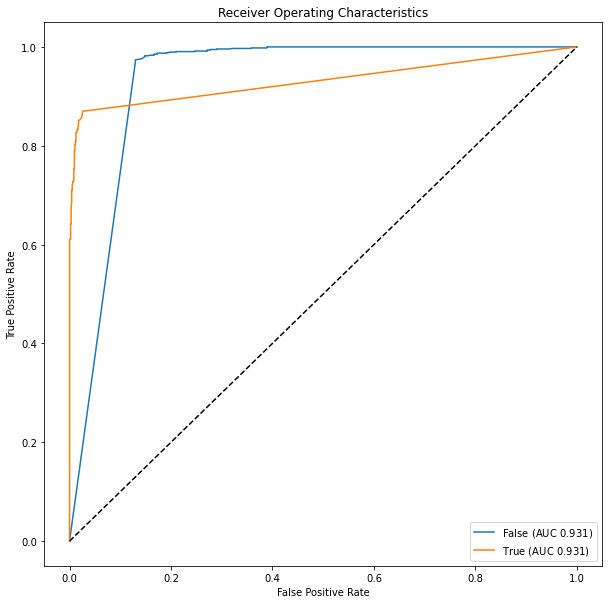

In [119]:
# Plot the ROC curves
lucem_illud.plotMultiROC(bag, test_data_df)


In [ ]:
# Perform ramdom forest with the uncoded data

In [121]:
COVID_tweets_uncoded['nb_predict'] = bag.predict(np.stack(COVID_tweets_uncoded['vect'], axis=0))
COVID_tweets_uncoded['nb_predict_prob_true'] = bag.predict_proba(np.stack(COVID_tweets_uncoded['vect'], axis=0))[:,0] #other is prop false
COVID_tweets_uncoded

,Messages,tokenized_text,normalized_text,vect,nb_predict,nb_predict_prob_true
0,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, crazy, Available, o...","[jurong, point, crazy, available, bugis, n, gr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.951345
1,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]","[okay, lar, joke, wif, u, oni]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.951345
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, wkly, comp, win, fa, cup, final,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,0.442685
3,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, U, c, already, t...","[u, dun, early, hor, u, c]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.951345
4,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, he...","[nah, think, go, usf, live]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.951345
...,...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, try, contact, u., u, win, £, pound...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,0.000000
5568,Will ü b going to esplanade fr home?,"[Will, ü, b, going, to, esplanade, fr, home]","[ü, b, go, esplanade, fr, home]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.951345
5569,"Pity, * was in mood for that. So...any other s...","[Pity, was, in, mood, for, that, So, any, othe...","[pity, mood, suggestion]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.951345
5570,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,...","[guy, bitch, act, like, interest, buy, week, g...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.951345


In [ ]:
# It's clear that in excerise 3, the ramdom forest gives me the best prediction performance

In [ ]:
# Ensemble learning combines the predictions from multiple neural network models 
# to reduce the variance of predictions and reduce generalization error.

# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

In [116]:
newsgroupsDF[:5]

,text,category,source_file,tokenized_text,normalized_text
0,\n\nParadise and salvation are not the same th...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[Paradise, and, salvation, are, not, the, same...","[paradise, salvation, thing, salvation, well, ..."
1,\nYou're admitting a lot more than that. You ...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[You, 're, admitting, a, lot, more, than, that...","[admit, lot, admit, moral, situational, admit,..."
2,"\n\nJesus also recognized other holy days, lik...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[Jesus, also, recognized, other, holy, days, l...","[jesus, recognize, holy, day, like, passover, ..."
3,In <lsjc8cINNmc1@saltillo.cs.utexas.edu> turpi...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[In, <, lsjc8cINNmc1@saltillo.cs.utexas.edu, >...","[<, lsjc8cinnmc1@saltillo.cs.utexas.edu, >, tu..."
4,"\nI'm sorry, but He does not! Ever read the F...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[I, 'm, sorry, but, He, does, not, Ever, read,...","[be, sorry, read, commandment]"


Make a testing and training set:

In [117]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [118]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [119]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [120]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

KNeighborsClassifier(n_neighbors=15)

In [121]:
lucem_illud.evaluateClassifier(clf_knearest, train_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
comp.graphics,0.381312,0.644196,0.392689,0.357710,0.701053
soc.religion.christian,0.268717,0.507447,1.000000,0.283611,0.014894
sci.space,0.293093,0.591006,0.455331,0.335178,0.333333
talk.religion.misc,0.317470,0.594017,0.266795,0.217752,0.457237


And lets look at the testing data

In [122]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.2558139534883721


Let's produce another confusion matrix:

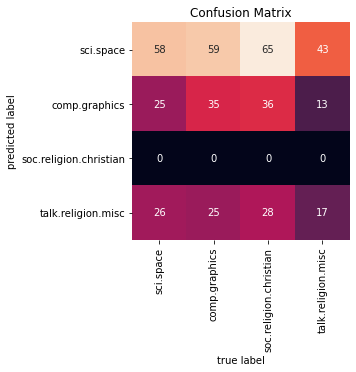

In [123]:
lucem_illud.plotConfusionMatrix(clf_knearest, test_ng_df)

You can produce the PCA space visual if you want, altough it can take a very long time, so we'll leave it optionally commented out:

In [124]:
#lucem_illud.plotregions(clf_knearest, test_ng_df)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [153]:
# Creat KNN model
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf_knearest.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])

KNeighborsClassifier(n_neighbors=15)

In [154]:
# Perform KNN with training data

In [155]:
# Predict

train_data_df['nb_predict'] = clf_knearest.predict(np.stack(train_data_df['vect'], axis=0))
print("Training score:")
print(clf_knearest.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))


Training score:
0.8779721848362494


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


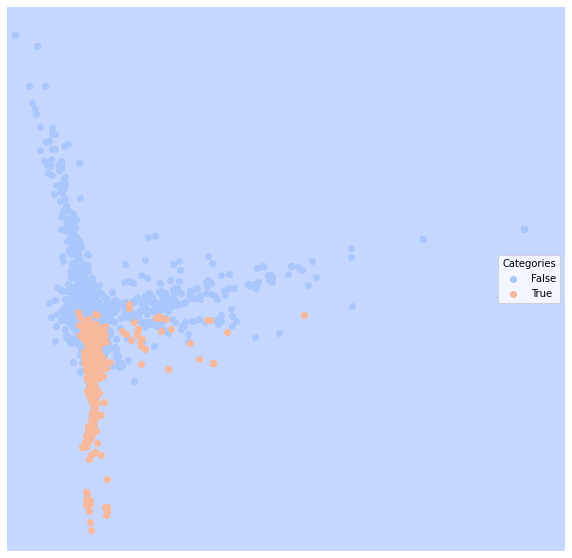

In [156]:
# Plot boundries 

lucem_illud.plotregions(clf_knearest, train_data_df)


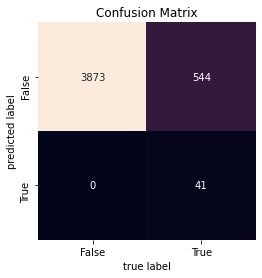

In [157]:
# Plot confusion matrix
lucem_illud.plotConfusionMatrix(clf_knearest, train_data_df)


In [158]:
# Evaluate AUC
lucem_illud.metrics.evaluateClassifier(clf_knearest, train_data_df)


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.122028,0.535043,0.876839,0.876839,1.000000
True,0.122028,0.535043,1.000000,0.192113,0.070085


In [159]:
# Calculate the accuracy, precision, recall, and F-measures.
# Accuracy 

print(sklearn.metrics.accuracy_score(train_data_df['category'],clf_knearest.predict(np.stack(train_data_df['vect'], axis = 0))))

# Precision
print(sklearn.metrics.precision_score(train_data_df['category'], train_data_df['nb_predict'], average = 'weighted')) 

# Recall
print(sklearn.metrics.recall_score(train_data_df['category'], train_data_df['nb_predict'], average = 'weighted')) 

# F-1 measure
print(sklearn.metrics.f1_score(train_data_df['category'], train_data_df['nb_predict'], average = 'weighted')) 


0.8779721848362494
0.8930011935410446
0.8779721848362494
0.8289543220366803


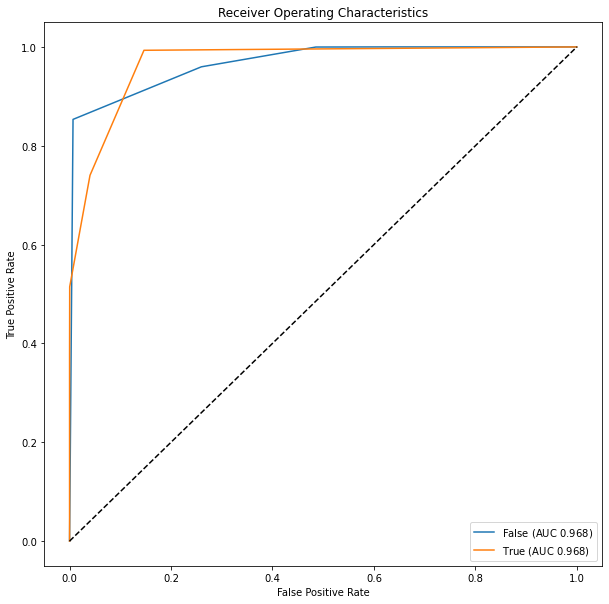

In [160]:
# Plot the ROC curves
lucem_illud.plotMultiROC(clf_knearest, train_data_df)


In [161]:
# Perform KNN with testing data

In [162]:
# Predict

test_data_df['nb_predict'] = clf_knearest.predict(np.stack(test_data_df['vect'], axis=0))
print("Training score:")
print(clf_knearest.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training score:
0.8617594254937163


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


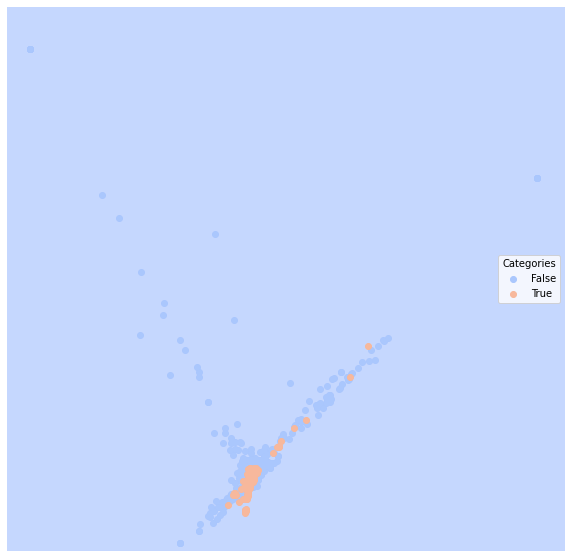

In [163]:
# Plot boundries 

lucem_illud.plotregions(clf_knearest, test_data_df)


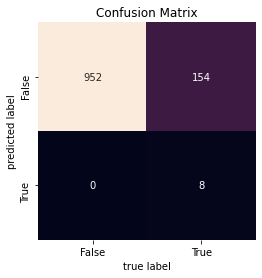

In [164]:
# Plot confusion matrix
lucem_illud.plotConfusionMatrix(clf_knearest, test_data_df)


In [165]:
# Evaluate AUC
lucem_illud.metrics.evaluateClassifier(clf_knearest, test_data_df)


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.138241,0.524691,0.860759,0.860759,1.000000
True,0.138241,0.524691,1.000000,0.187623,0.049383


In [166]:
# Calculate the accuracy, precision, recall, and F-measures.
# Accuracy 

print(sklearn.metrics.accuracy_score(test_data_df['category'],clf_knearest.predict(np.stack(test_data_df['vect'], axis = 0))))

# Precision
print(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'], average = 'weighted')) 

# Recall
print(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'], average = 'weighted')) 

# F-1 measure
print(sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'], average = 'weighted')) 


0.8617594254937163
0.8810081130831988
0.8617594254937163
0.8043168434339624


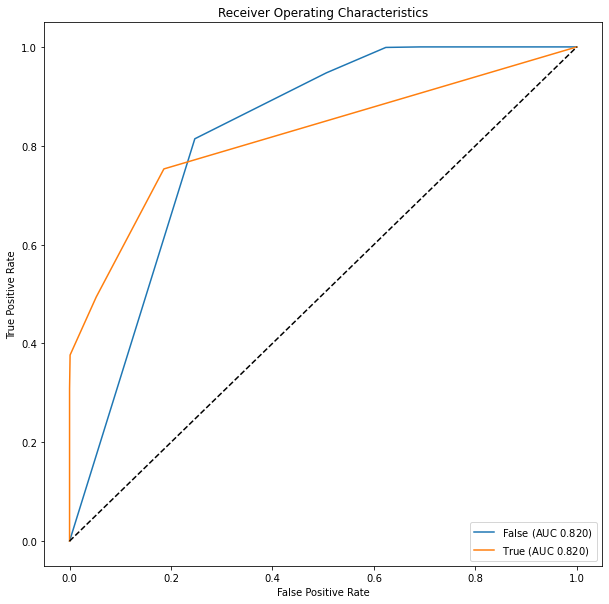

In [167]:
# Plot the ROC curves
lucem_illud.plotMultiROC(clf_knearest, test_data_df)


In [168]:
# k-means clustering is unsupervised. Used for gathering and grouping data into k number of clusters

# KNN is supervised. It classifies accordingly to the k closest data points

# SVMs

Now we will examine Support Vector Machines, an approach that creates the partition that preserves the "maximum margin" between classes.

We will use a few sub forums from reddit--which tend to share text rather than memes--namely `talesfromtechsupport`, `badroommates`, `weeabootales` and `relationships`. The top 100 text posts from each have been saved to `data/reddit.csv`.

In [125]:
redditDf = pandas.read_csv('../data/reddit.csv', index_col = 0)

#Drop a couple missing values

redditDf = redditDf.dropna()

#Set category

redditDf['category'] = redditDf['subreddit']

#tokenize and normalize
redditDf['tokenized_text'] = redditDf['text'].apply(lambda x: lucem_illud.word_tokenize(x))
redditDf['normalized_text'] = redditDf['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

In [127]:
redditDf[:3]

,author,over_18,score,subreddit,text,title,url,category,tokenized_text,normalized_text
0,guitarsdontdance,False,14089,Tales From Tech Support,So my story starts on what was a normal day ta...,"""Don't bother sending a tech, I'll be dead by ...",https://www.reddit.com/r/talesfromtechsupport/...,Tales From Tech Support,"[So, my, story, starts, on, what, was, a, norm...","[story, start, normal, day, take, call, line, ..."
1,SECGaz,False,13724,Tales From Tech Support,"> $Me - Hello, IT. > $Usr - Hi, I am still ...","Hi, I am still off sick but I am not.",https://www.reddit.com/r/talesfromtechsupport/...,Tales From Tech Support,"[>, $, Me, Hello, IT, >, $, Usr, Hi, I, am, st...","[>, $, hello, >, $, usr, hello, sick, >, $, oh..."
2,Clickity_clickity,False,13404,Tales From Tech Support,[Part 1](http://www.reddit.com/r/talesfromtech...,"Jack, the Worst End User, Part 4",https://www.reddit.com/r/talesfromtechsupport/...,Tales From Tech Support,"[Part, 1](http://www.reddit.com, r, talesfromt...","[1](http://www.reddit.com, r, talesfromtechsup..."


We will tf.idf the data to make our vectors:

In [128]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in redditDf['normalized_text']])
redditDf['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

Initilize the model and make a train test split:

In [129]:
holdBackFraction = .2
train_redditDf, test_redditDf = lucem_illud.trainTestSplit(redditDf, holdBackFraction=holdBackFraction)

In [130]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

SVC(kernel='linear')

...and consider the results:

In [131]:
lucem_illud.evaluateClassifier(clf_svm, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Tales From Tech Support,0.003135,0.997845,0.988636,0.988636,1.000000
Relationships,0.021944,0.965530,0.988636,0.943662,0.935484
Weeaboo Tales: stories about the extreme fans of japanese culture,0.006270,0.985294,1.000000,0.976858,0.970588
Bad Roommates: Tales of Irritation,0.025078,0.978845,0.909091,0.899422,0.985915


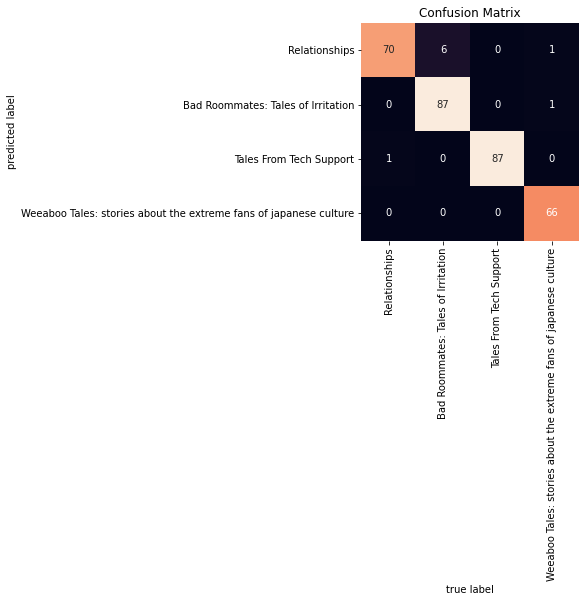

In [132]:
lucem_illud.plotConfusionMatrix(clf_svm, test_redditDf)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

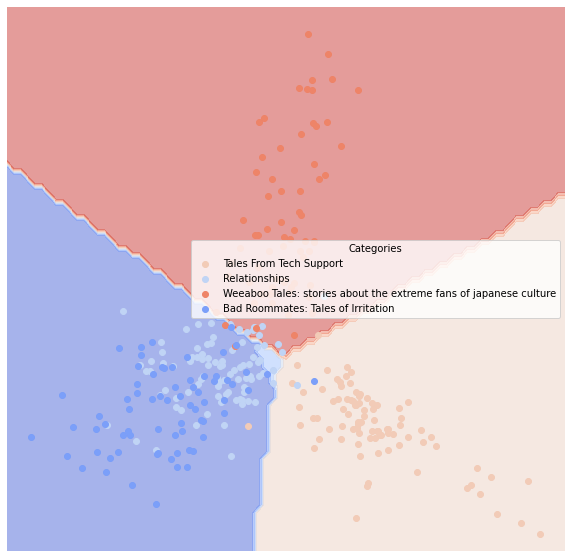

In [133]:
lucem_illud.plotregions(clf_svm, test_redditDf)

# Neural Nets

We include an example of a simple neural network, the Multi-layer Perceptron (MLP) that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output. ![title](../data/multilayerperceptron_network.png) The leftmost layer, known as the input layer, consists of a set of "neurons" $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features (e.g., weighted words). Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the logistic or hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

In [134]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

MLPClassifier()

In [135]:
lucem_illud.evaluateClassifier(clf_nn, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Tales From Tech Support,0.012539,0.984195,0.977011,0.960821,0.977011
Relationships,0.034483,0.947188,0.976744,0.910434,0.903226
Weeaboo Tales: stories about the extreme fans of japanese culture,0.009404,0.988663,0.971014,0.959870,0.985294
Bad Roommates: Tales of Irritation,0.025078,0.978845,0.909091,0.899422,0.985915


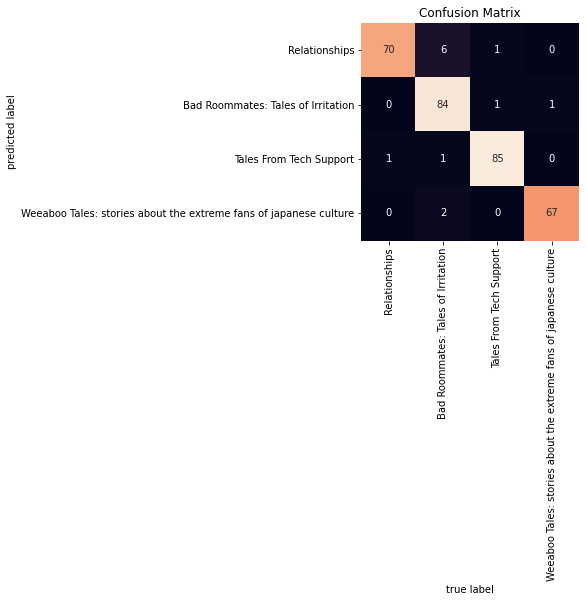

In [136]:
lucem_illud.plotConfusionMatrix(clf_nn, test_redditDf)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

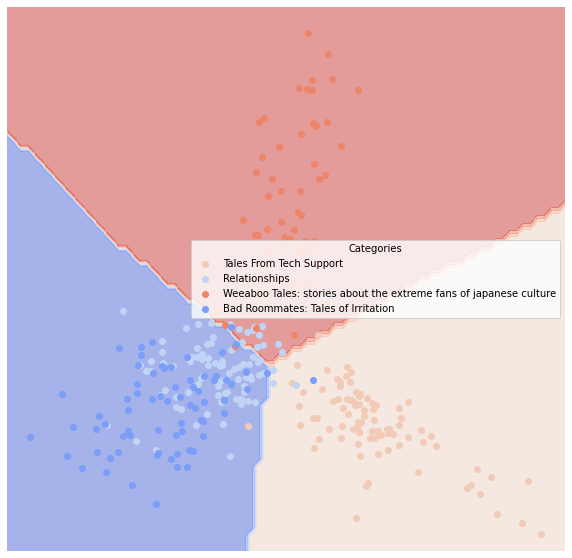

In [137]:
lucem_illud.plotregions(clf_nn, test_redditDf)

It performs very well.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [169]:
# Fit the model
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

MLPClassifier()

In [28]:
# Predict

train_data_df['nb_predict'] = clf_nn.predict(np.stack(train_data_df['vect'], axis=0))
print("Training score:")
print(clf_nn.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))


Training score:
0.9993270524899058


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


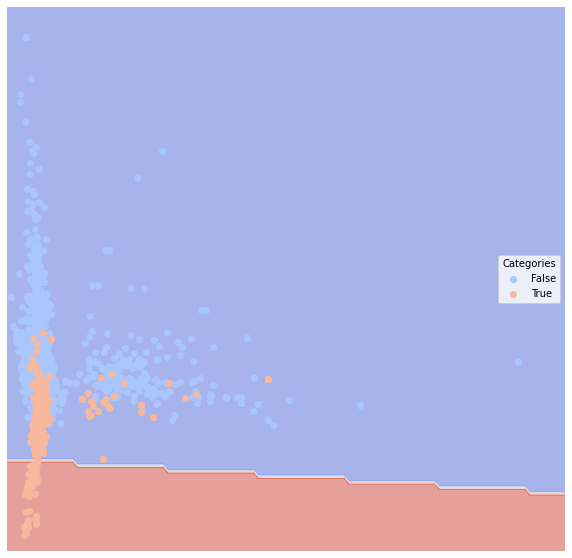

In [29]:
# Plot boundries 

lucem_illud.plotregions(clf_nn, train_data_df)


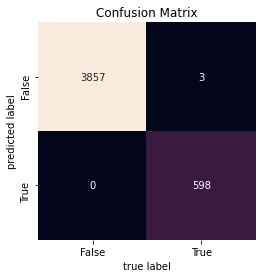

In [30]:
# Plot confusion matrix
lucem_illud.plotConfusionMatrix(clf_nn, train_data_df)


In [31]:
# Evaluate AUC
lucem_illud.metrics.evaluateClassifier(clf_nn, train_data_df)


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.000673,0.997504,0.999223,0.999223,1.000000
True,0.000673,0.997504,1.000000,0.995681,0.995008


In [32]:
# Calculate the accuracy, precision, recall, and F-measures.
# Accuracy 

print(sklearn.metrics.accuracy_score(train_data_df['category'],clf_nn.predict(np.stack(train_data_df['vect'], axis = 0))))

# Precision
print(sklearn.metrics.precision_score(train_data_df['category'], train_data_df['nb_predict'], average = 'weighted')) 

# Recall
print(sklearn.metrics.recall_score(train_data_df['category'], train_data_df['nb_predict'], average = 'weighted')) 

# F-1 measure
print(sklearn.metrics.f1_score(train_data_df['category'], train_data_df['nb_predict'], average = 'weighted')) 


0.9993270524899058
0.9993275755061054
0.9993270524899058
0.9993263414088273


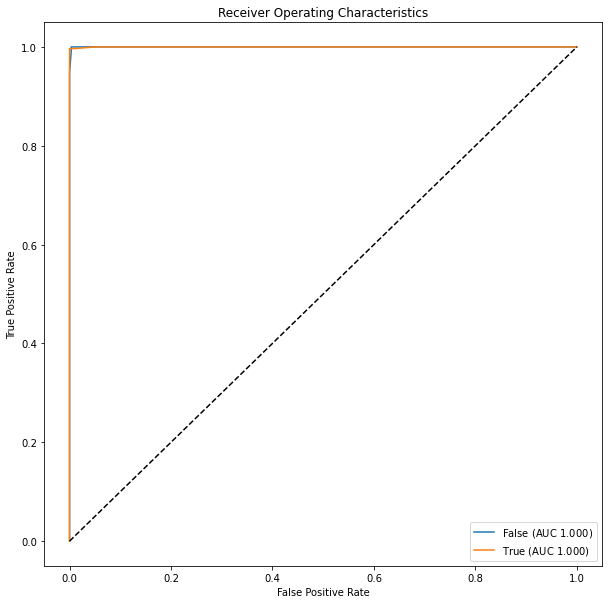

In [33]:
# Plot the ROC curves
lucem_illud.plotMultiROC(clf_nn, train_data_df)


In [ ]:
# Perform Neural Nets with testing data


In [34]:
# Predict

test_data_df['nb_predict'] = clf_nn.predict(np.stack(test_data_df['vect'], axis=0))
print("Testing score:")
print(clf_nn.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))


Testing score:
0.981149012567325


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


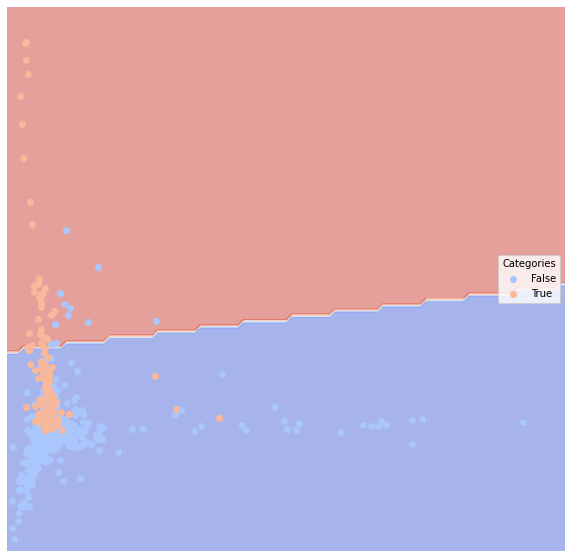

In [35]:
# Plot boundries 

lucem_illud.plotregions(clf_nn, test_data_df)


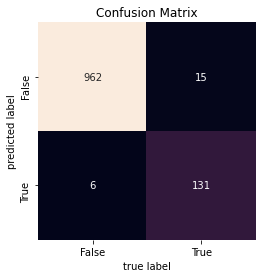

In [36]:
# Plot confusion matrix
lucem_illud.plotConfusionMatrix(clf_nn, test_data_df)


In [37]:
# Evaluate AUC
lucem_illud.metrics.evaluateClassifier(clf_nn, test_data_df)


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.018851,0.945531,0.984647,0.983930,0.993802
True,0.018851,0.945531,0.956204,0.871429,0.897260


In [38]:
# Calculate the accuracy, precision, recall, and F-measures.
# Accuracy 

print(sklearn.metrics.accuracy_score(test_data_df['category'],clf_nn.predict(np.stack(test_data_df['vect'], axis = 0))))

# Precision
print(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'], average = 'weighted')) 

# Recall
print(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'], average = 'weighted')) 

# F-1 measure
print(sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'], average = 'weighted')) 


0.981149012567325
0.9809192257740317
0.981149012567325
0.9808928759935077


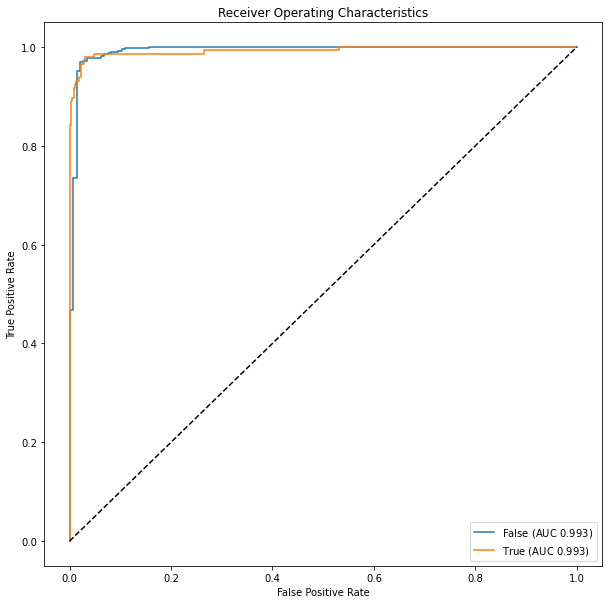

In [39]:
# Plot the ROC curves
lucem_illud.plotMultiROC(clf_nn, test_data_df)


In [ ]:
# Perform with Neural Nets with uncoded data

In [170]:
COVID_tweets_uncoded['nb_predict'] = clf_nn.predict(np.stack(COVID_tweets_uncoded['vect'], axis=0))
COVID_tweets_uncoded['nb_predict_prob_true'] = clf_nn.predict_proba(np.stack(COVID_tweets_uncoded['vect'], axis=0))[:,0] #other is prop false
COVID_tweets_uncoded

,Messages,tokenized_text,normalized_text,vect,nb_predict,nb_predict_prob_true
0,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, crazy, Available, o...","[jurong, point, crazy, available, bugis, n, gr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.999942
1,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]","[okay, lar, joke, wif, u, oni]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.999811
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, wkly, comp, win, fa, cup, final,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,0.000126
3,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, U, c, already, t...","[u, dun, early, hor, u, c]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.999827
4,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, he...","[nah, think, go, usf, live]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.999775
...,...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, try, contact, u., u, win, £, pound...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,0.000028
5568,Will ü b going to esplanade fr home?,"[Will, ü, b, going, to, esplanade, fr, home]","[ü, b, go, esplanade, fr, home]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.999544
5569,"Pity, * was in mood for that. So...any other s...","[Pity, was, in, mood, for, that, So, any, othe...","[pity, mood, suggestion]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.998595
5570,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,...","[guy, bitch, act, like, interest, buy, week, g...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,0.999872


In [ ]:
# How does this classify relevant to k-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

# They all can be used for classification task.
# However, Deep Learning out perform other techniques if the data size is large. 
# But with small data size, traditional Machine Learning algorithms are preferable.

# When there is lack of domain understanding for feature introspection, 
# Deep Learning techniques outshines others as you have to worry less about feature engineering.

# Deep Learning really shines when it comes to complex problems such as image classification, 
# natural language processing, and speech recognition.

# Reference: https://towardsdatascience.com/why-deep-learning-is-needed-over-traditional-machine-learning-1b6a99177063